In [3]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import getdist

In [4]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [150]:
deltaN = 0.1
me=0.001
mp=1
alpha=0.0073
r_choices=[0.1,0.01,0.001]



In [169]:
for deltaN in [0.01,0.1,0.3]:
    for me in [0.001]:
        for mp in [1]:
            for alpha in [0.0073]:
                for r_choices in [[0.1,0.01,0.001]]:
                    make_plots(deltaN,me,mp,alpha,r_choices)

In [5]:

def Sigma_DAO(mp,me,alpha):
    #inputs are mp in GeV, me in MeV. 
    #need mp in GeV, me in eV
    me *= 10**6
    return alpha * (2/(alpha**2 * me)) * mp**(-1/6)

def compute_class(r,deltaN,mp,me,alpha):
    settings = {'output':'tCl,pCl,lCl,mPk',
                     'lensing':'yes',
                       'omega_b':0.0224,
                       'omega_cdm':0.119,
                       '100*theta_s':1.04,
                       'ln10^{10}A_s':3.05,
                       'n_s':0.965,
                       'tau_reio':0.0576,
                        'YHe_twin':0,
                       'r_all_twin':r,
                       'Delta_N_twin':deltaN,
                       'm_p_dark':mp,
                        'm_e_dark':me,
                        'alpha_dark':alpha}
    M = Class()
    M.set(settings)
    M.compute()
    thermo = M.get_thermodynamics()
    return thermo

def plot_xe(thermo):
    plt.figure(figsize=(8,8),dpi=300)
    plt.semilogx(thermo['z'],thermo['x_e_twin'],lw=3)#'0.1, 0.1, 1, 1, 0.01')

    plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
    plt.grid()

    plt.xlim(5*10**2,10**6)
    plt.ylim(10**-6,1.2)
    plt.semilogy()
    plt.gca().invert_xaxis()
    #plt.legend()
    plt.text(10**5.9,10**-3.3,'$\hat{r}$ = 0.1,$\\Delta N_{eff}$ = 0.1,\n$m_{p}$\' = 1 GeV, $m_{e}$\' = 1 MeV, $\\alpha$\' = 0.01',fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
    plt.xlabel('z',fontsize=24)
    plt.ylabel('$x_e$',fontsize=24)
    plt.title('ADM Ionization Fraction')

In [12]:
thermo_base = compute_class(0.05,0.1,1,0.001,0.01)

In [13]:
thermo_2 = compute_class(0.05,0.1,1,0.002,0.005)

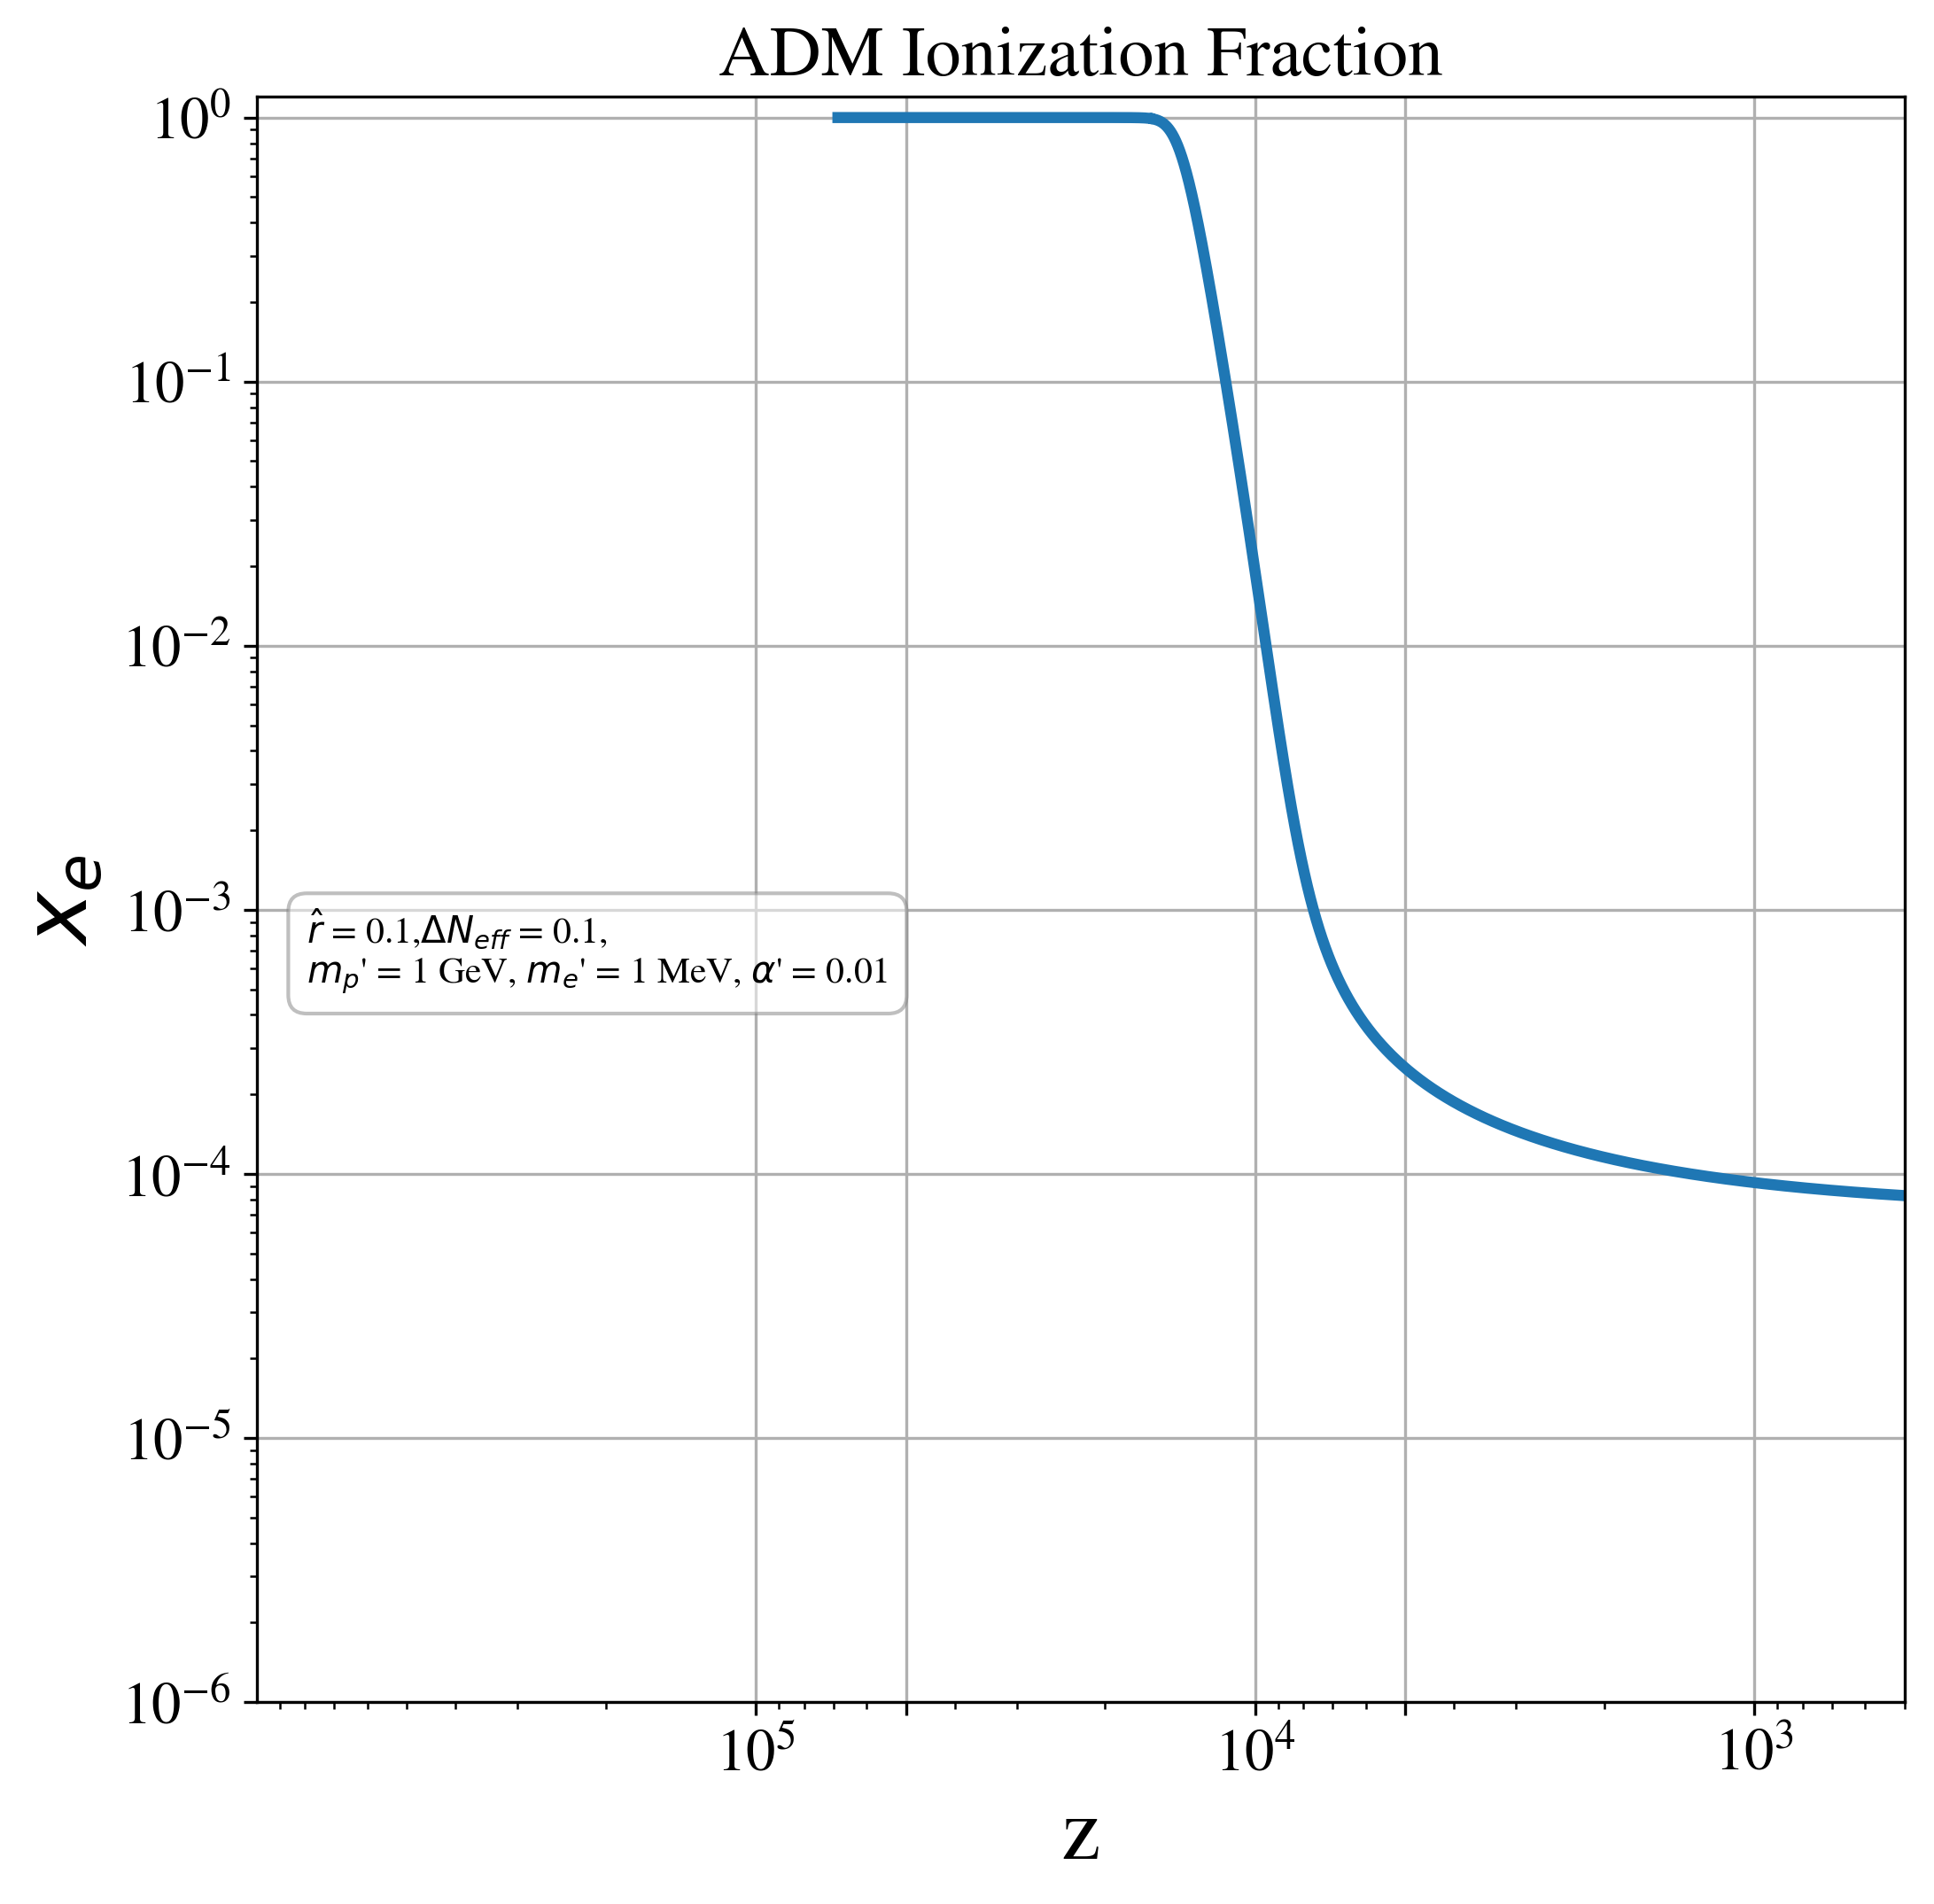

In [14]:
plot_xe(thermo_base)

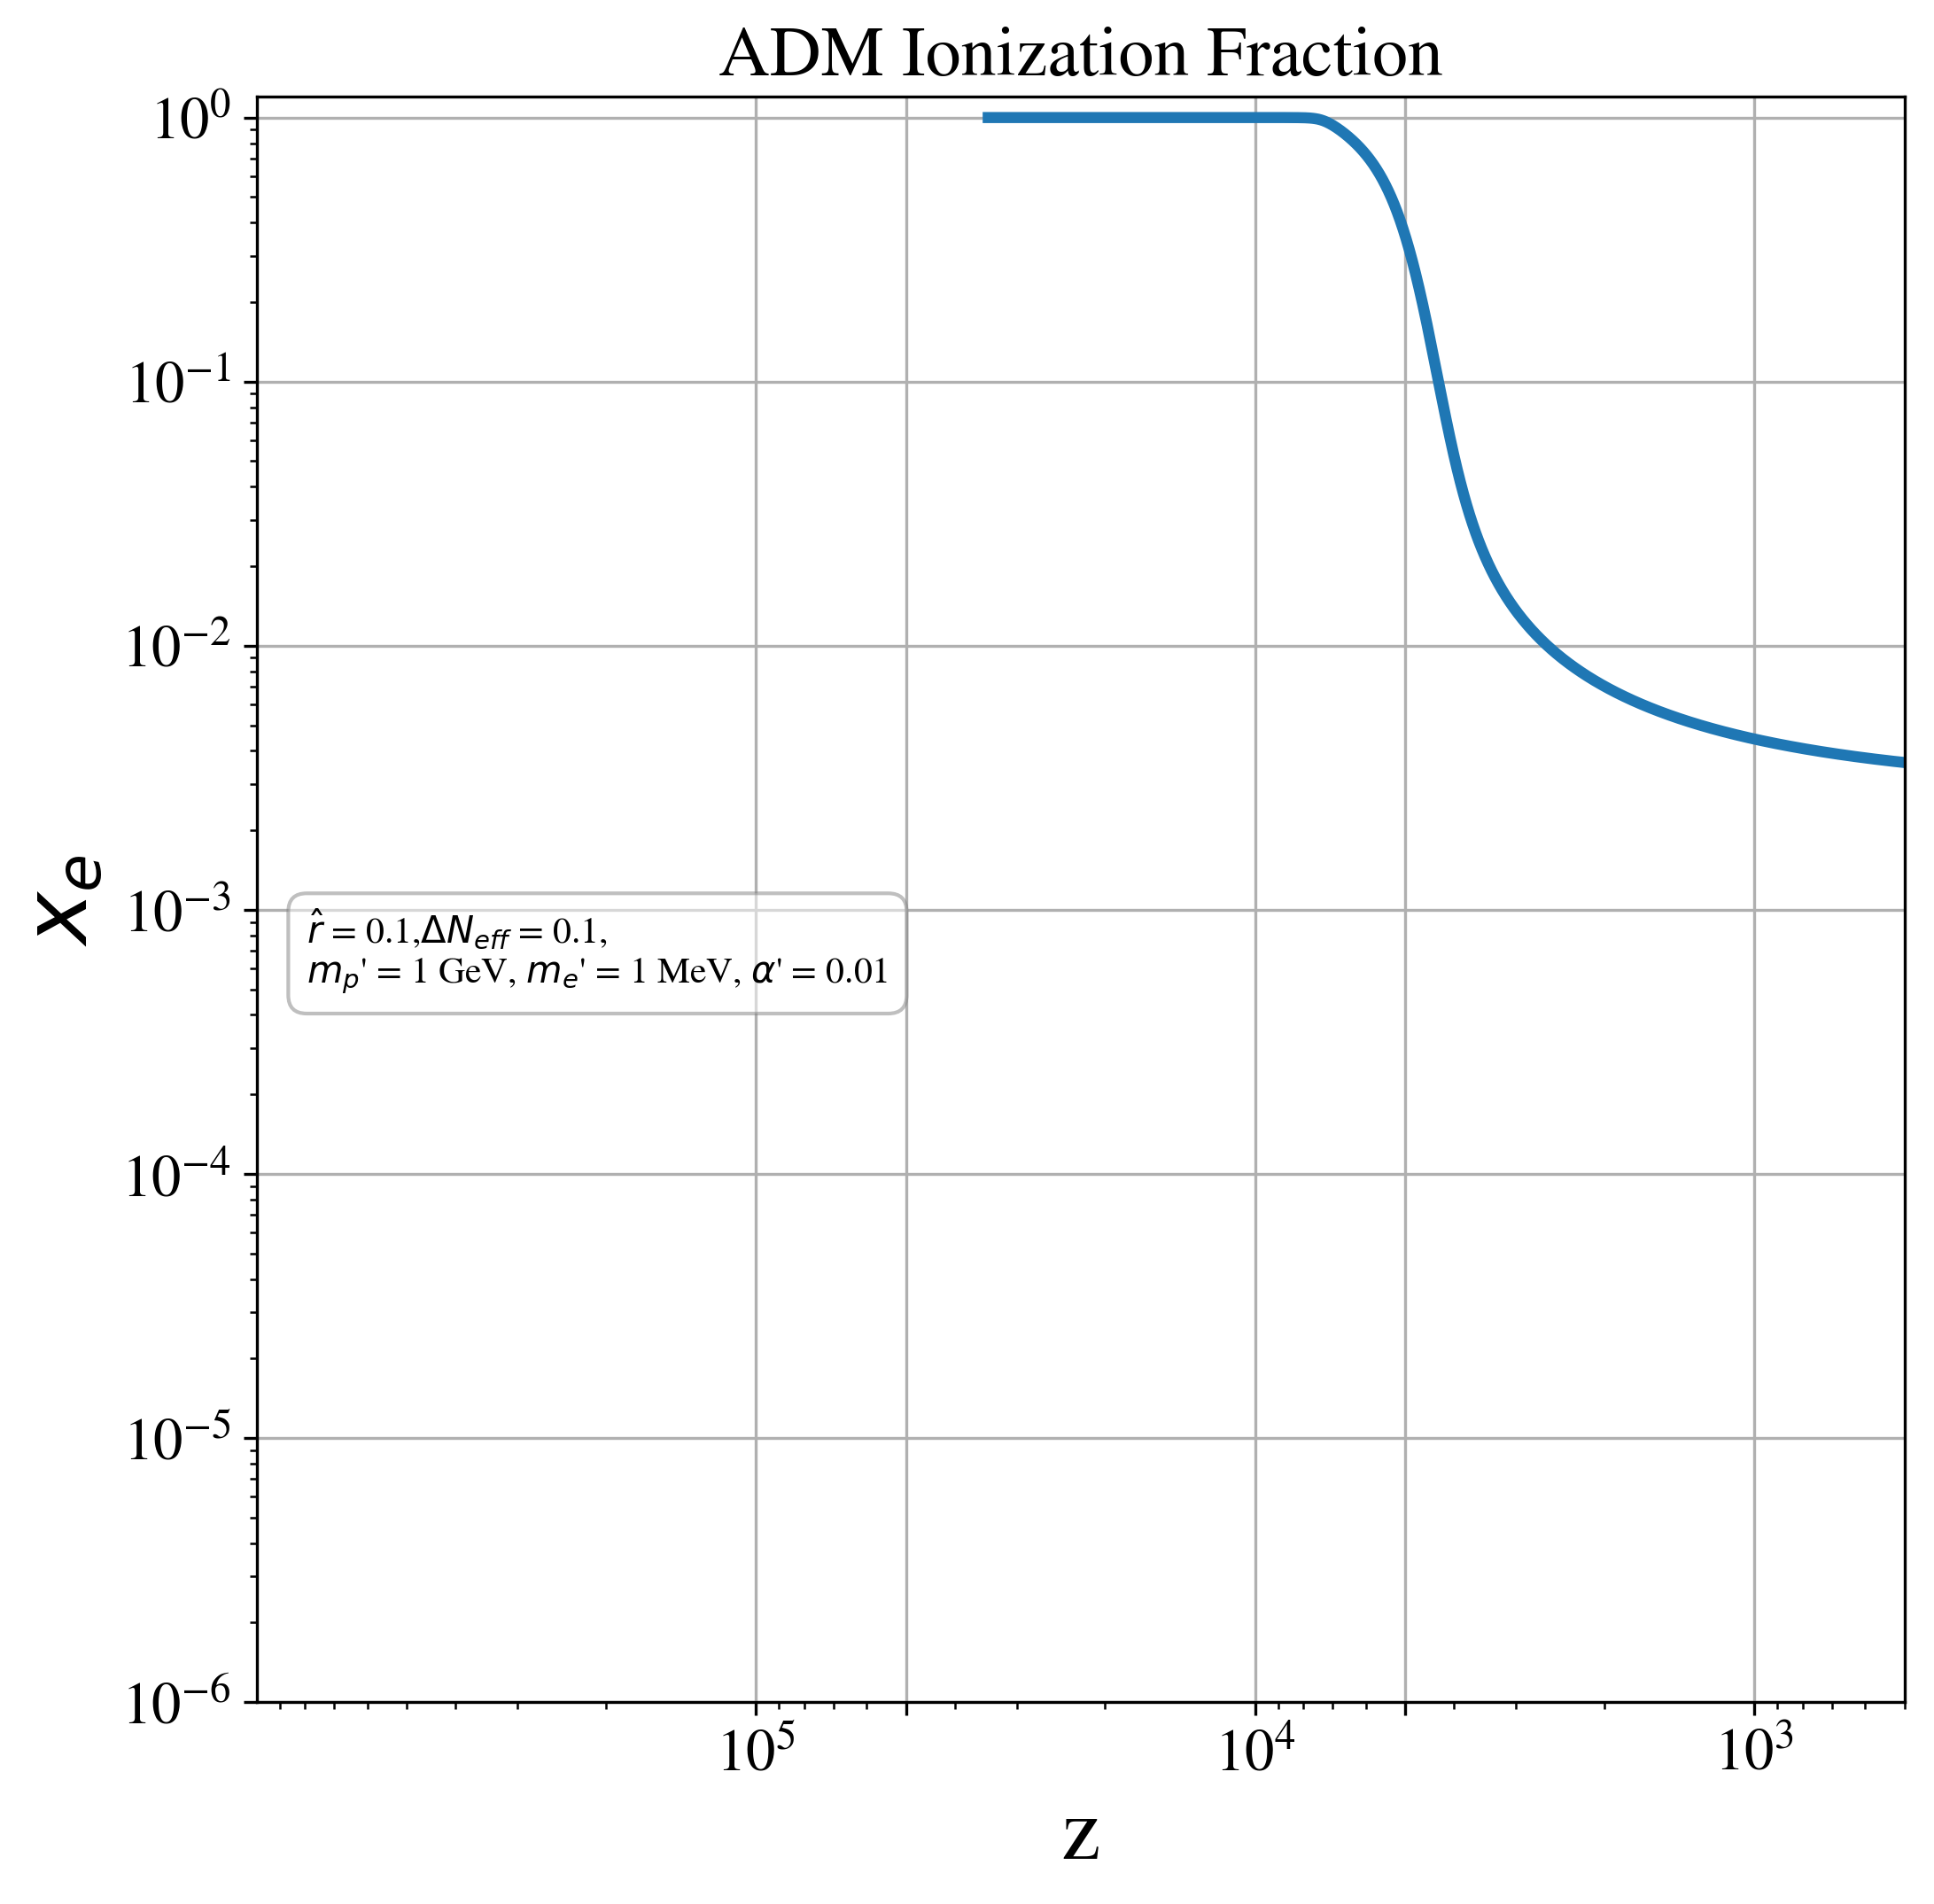

In [15]:
plot_xe(thermo_2)

In [6]:
print(np.log10(Sigma_DAO(10,.01,0.01)))
print(np.log10(Sigma_DAO(100,.01*10**(-1/6),0.01)))

-1.8656366710026855
-1.8656366710026855


In [7]:
thermo1 = compute_class(0.05,0.1,10,0.01,0.01)

In [8]:
thermo2 = compute_class(0.05,0.1,100,0.01*10**(-1/6),0.01)

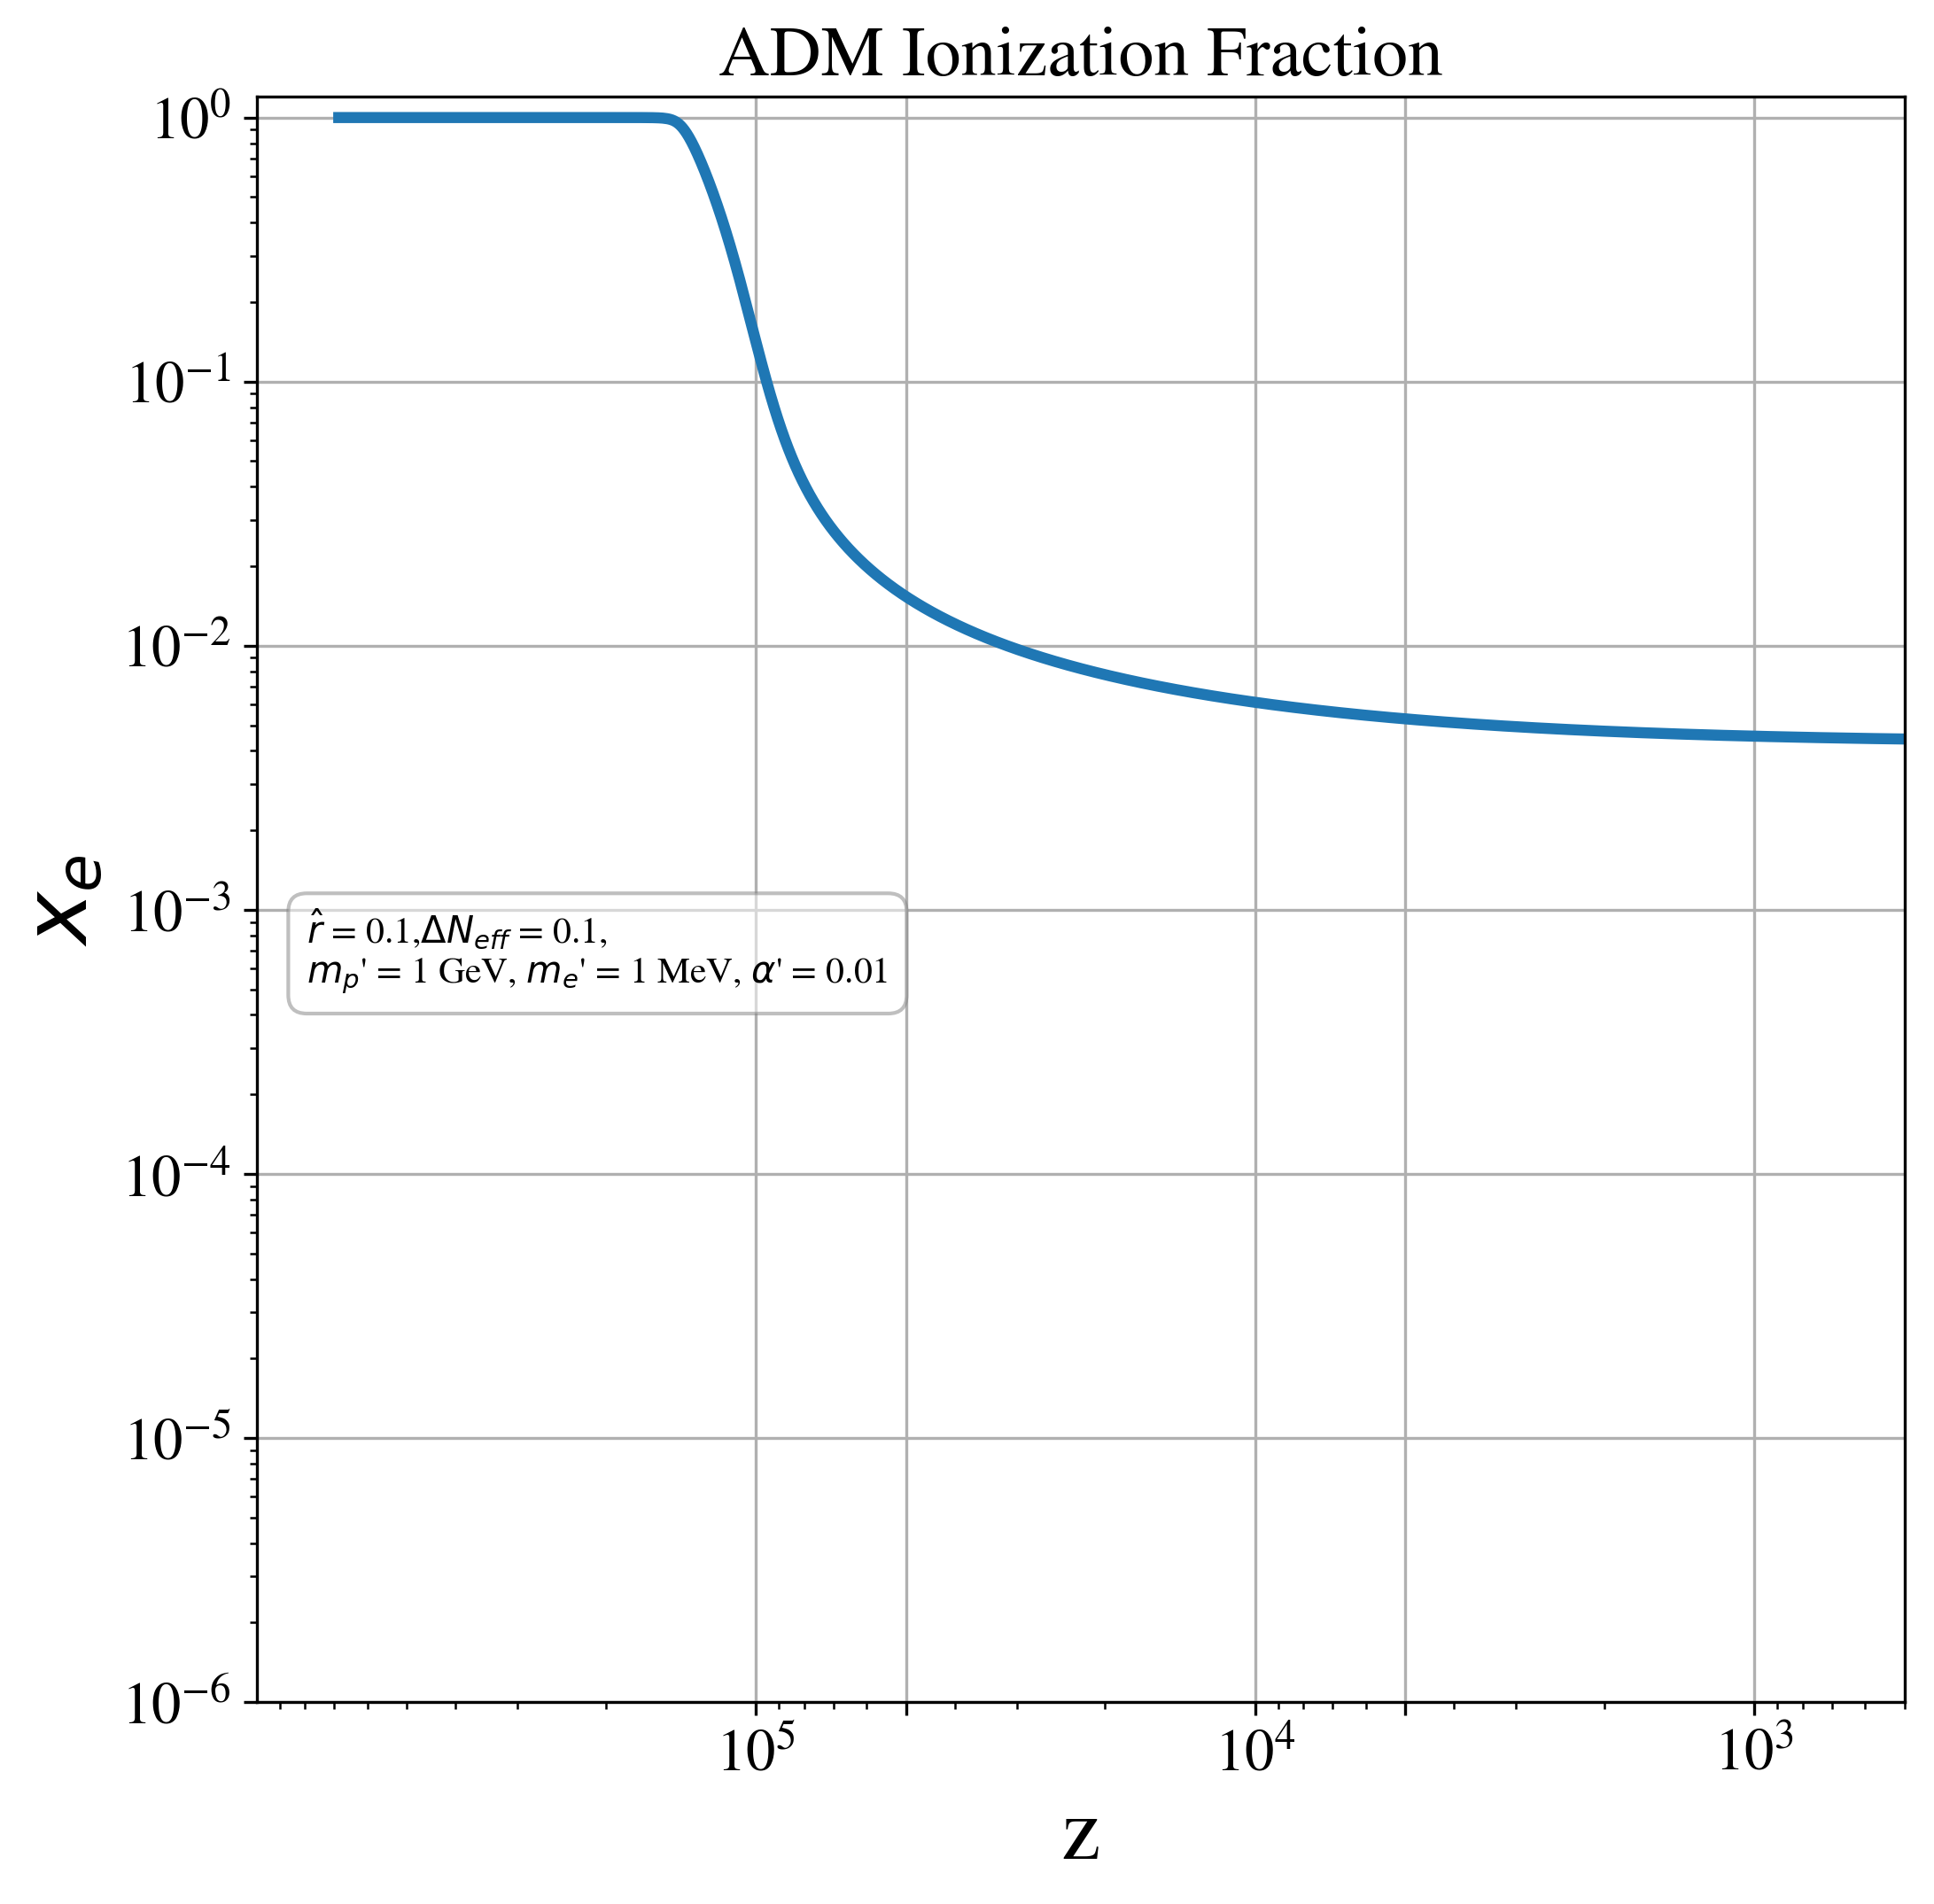

In [9]:
plot_xe(thermo1)

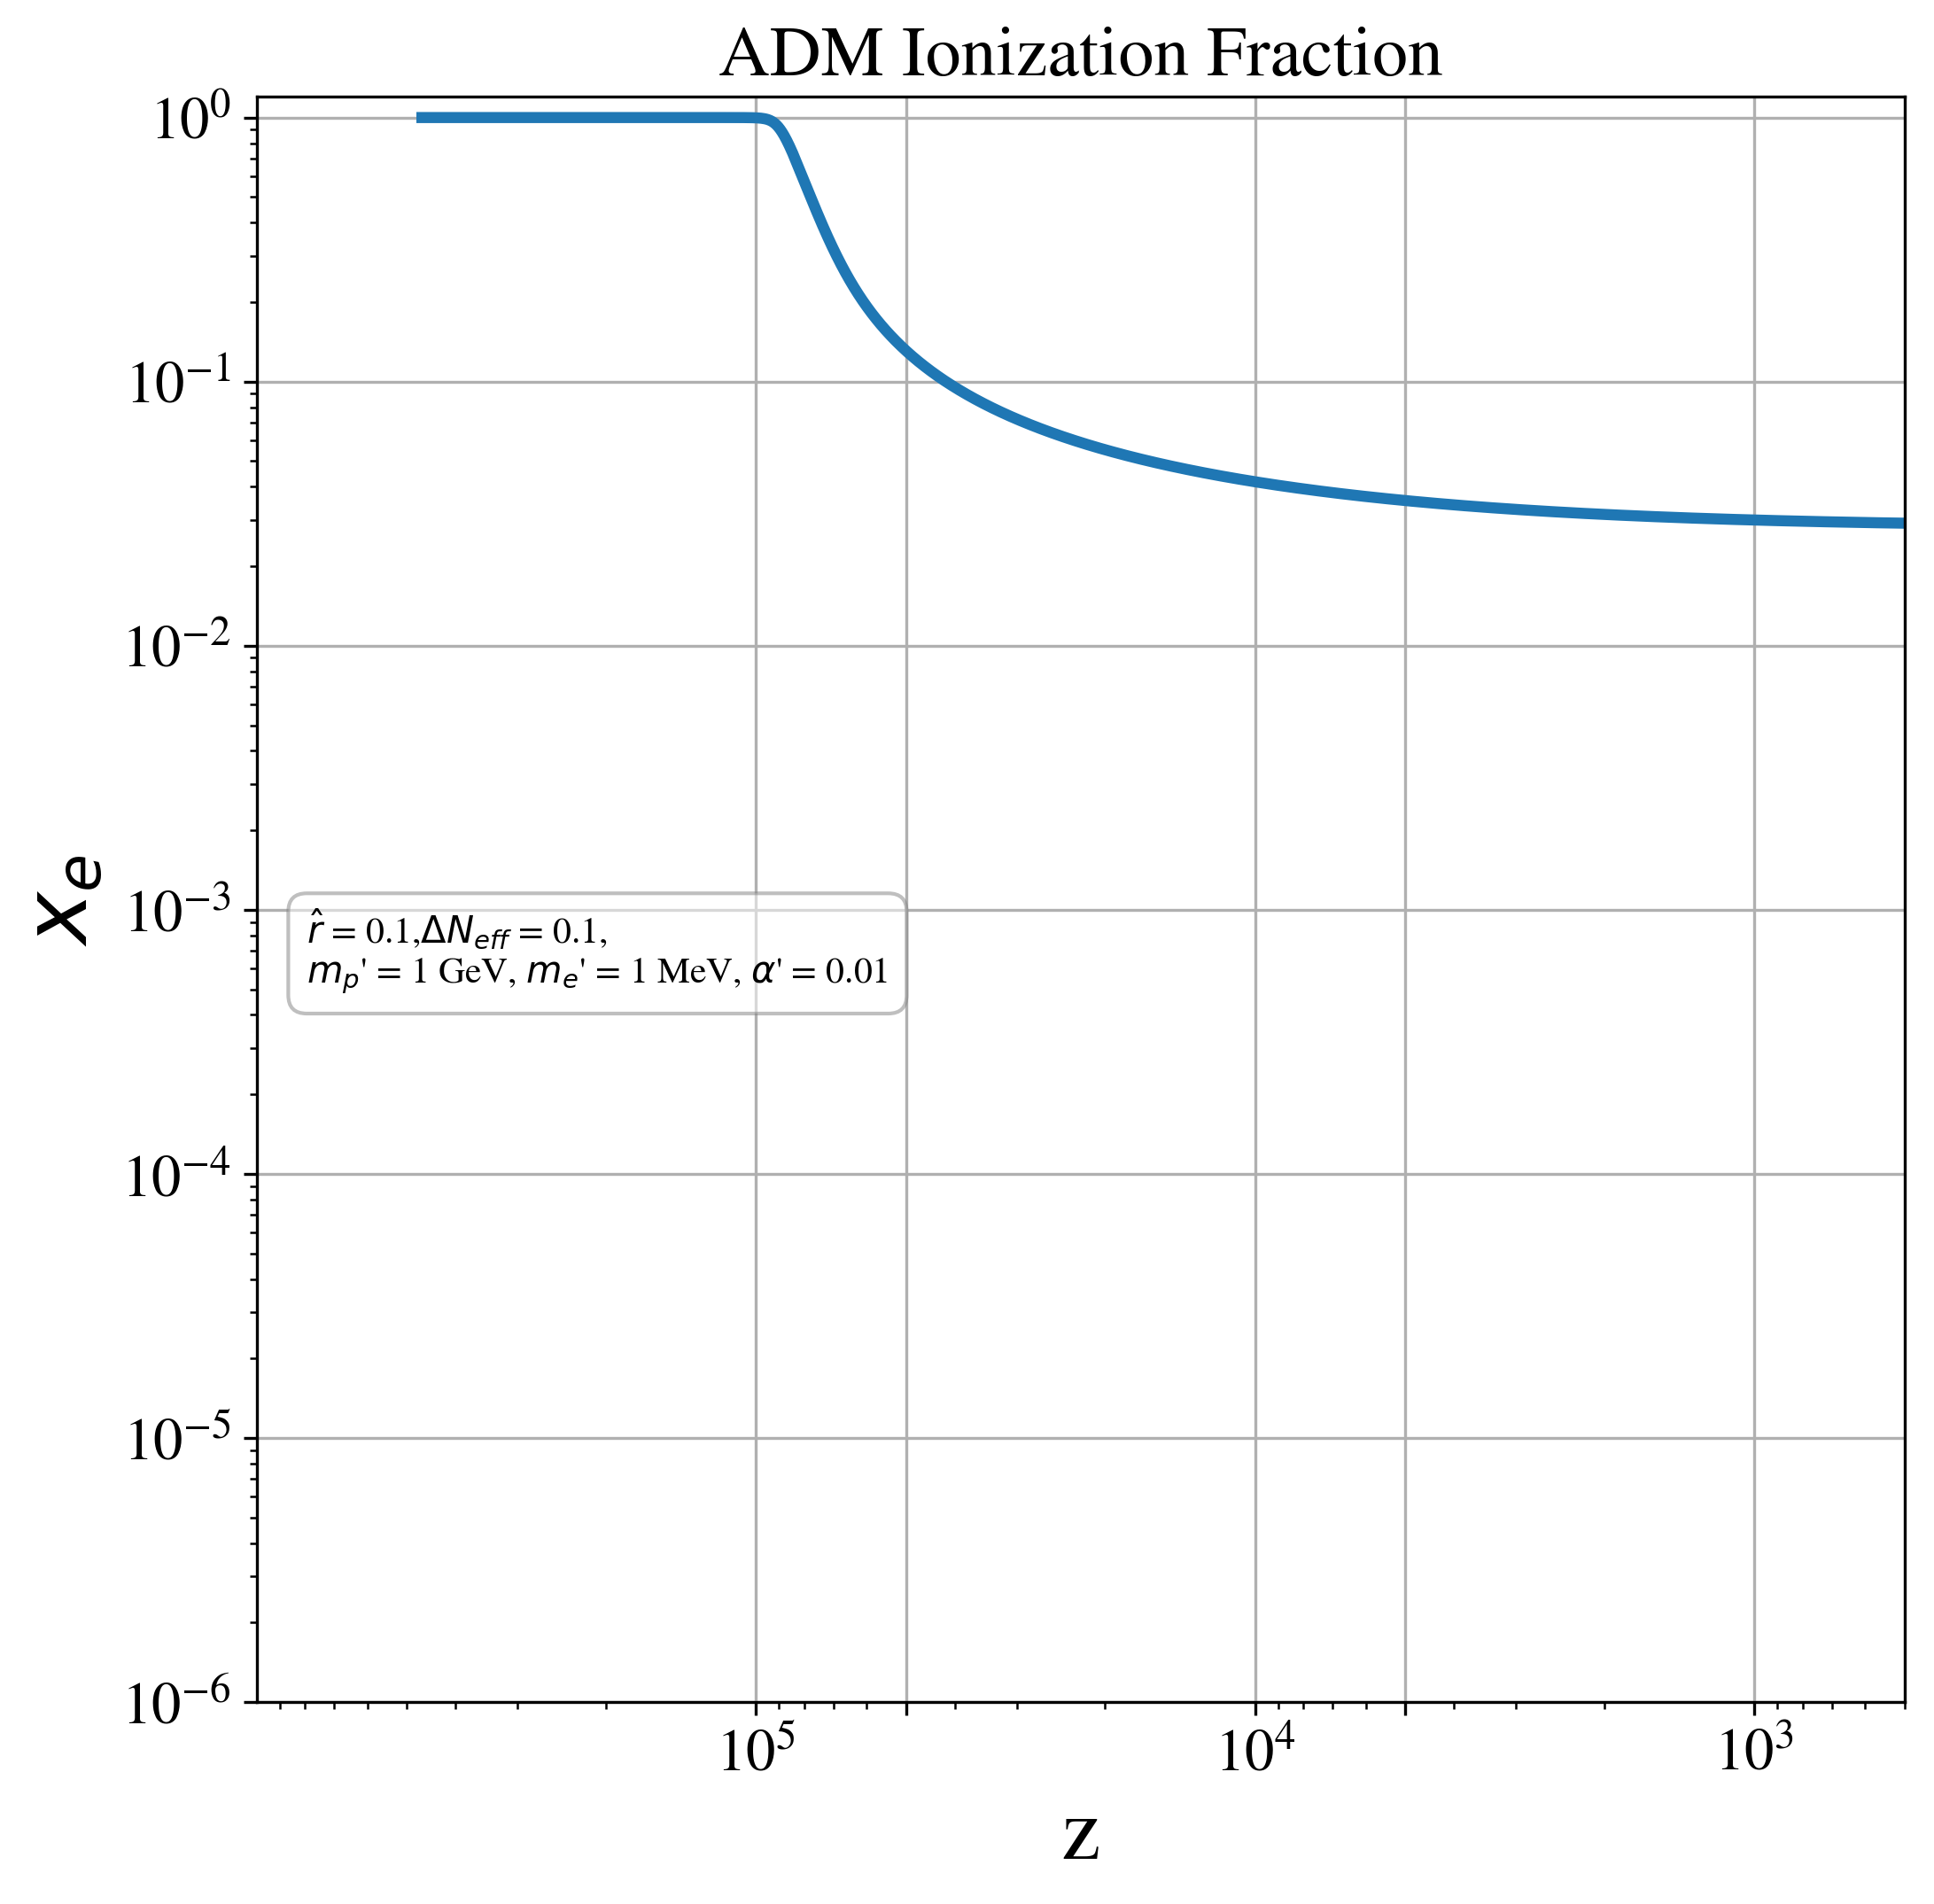

In [10]:
plot_xe(thermo2)

In [168]:
def make_plots(deltaN,me,mp,alpha,r_choices):

    twin_settings = {'output':'tCl,pCl,lCl,mPk',
                     'lensing':'yes',
                       'omega_b':0.0224,
                       'omega_cdm':0.119,
                       '100*theta_s':1.04,
                       'ln10^{10}A_s':3.05,
                       'n_s':0.965,
                       'tau_reio':0.0576,
                        'YHe_twin':0,
                       'r_all_twin':r_choices[0],
                       'Delta_N_twin':deltaN,
                       'm_p_dark':mp,
                        'm_e_dark':me,
                        'alpha_dark':alpha}  

    M_twin1 = Class()
    M_twin1.set(twin_settings)
    M_twin1.compute()
    thermo_twin1 = M_twin1.get_thermodynamics()

    twin_settings = {'output':'tCl,pCl,lCl,mPk',
                     'lensing':'yes',
                       'omega_b':0.0224,
                       'omega_cdm':0.119,
                       '100*theta_s':1.04,
                       'ln10^{10}A_s':3.05,
                       'n_s':0.965,
                       'tau_reio':0.0576,
                     'YHe_twin':0,
                       'r_all_twin':r_choices[1],
                       'Delta_N_twin':deltaN,
                       'm_p_dark':mp,
                        'm_e_dark':me,
                        'alpha_dark':alpha}   

    M_twin2 = Class()
    M_twin2.set(twin_settings)
    M_twin2.compute()
    thermo_twin2 = M_twin2.get_thermodynamics()

    twin_settings = {'output':'tCl,pCl,lCl,mPk',
                     'lensing':'yes',
                       'omega_b':0.0224,
                       'omega_cdm':0.119,
                       '100*theta_s':1.04,
                       'ln10^{10}A_s':3.05,
                       'n_s':0.965,
                       'tau_reio':0.0576,
                     'YHe_twin':0,
                       'r_all_twin':r_choices[2],
                       'Delta_N_twin':deltaN,
                       'm_p_dark':mp,
                        'm_e_dark':me,
                        'alpha_dark':alpha}   

    M_twin3 = Class()
    M_twin3.set(twin_settings)
    M_twin3.compute()
    thermo_twin3 = M_twin3.get_thermodynamics()

    LambdaCDM_DeltaNeff_settings =  {'output':'tCl,pCl,lCl,mPk',
                                     'lensing':'yes',
                                       'omega_b':0.0224,
                                       'omega_cdm':0.119,
                                       '100*theta_s':1.04,
                                       'ln10^{10}A_s':3.05,
                                       'n_s':0.965,
                                       'tau_reio':0.0576,
                                       'N_ur':3.046 + deltaN,
                                       'r_all_twin':0,
                                       'Delta_N_twin':0.01,
                                       'm_p_dark':mp,
                                        'm_e_dark':me,
                                        'alpha_dark':alpha}   


    M = Class()
    M.set(LambdaCDM_DeltaNeff_settings)
    M.compute()
    thermo= M.get_thermodynamics()

    
  
    #Matter power spectrum
    kk = np.logspace (-2,np.log10(1),1000)
    Pk = []
    Pk_twin1 = []
    Pk_twin2 = []
    Pk_twin3 = []
    for k in kk :
        Pk.append (M.pk (k ,0.) ) 
        Pk_twin1.append (M_twin1.pk (k ,0.) )
        Pk_twin2.append (M_twin2.pk (k ,0.) )
        Pk_twin3.append (M_twin3.pk (k ,0.) )

    plt.figure(figsize=(6,6),dpi=300)
    plt.xscale ('log'); plt.xlim (kk[0],kk[ -1]); plt.ylim(0.4,1.05);
    plt.xlabel (r'$k [h/\mathrm { Mpc }]$')
    plt.ylabel (r'$P(k) [\mathrm {Mpc }/h ]^3 $')
    #plt.plot (kk ,Pk ,'b-')
    #plt.plot (kk ,Pk_twin ,'r-')
    plt.plot(kk/0.7,np.array(Pk_twin1)/np.array(Pk),label='r=0.1')
    plt.plot(kk/0.7,np.array(Pk_twin2)/np.array(Pk),label='r=0.01')
    plt.plot(kk/0.7,np.array(Pk_twin3)/np.array(Pk),label='r=0.001')

    plt.legend()
    plt.title('ADM/($\\Lambda$CDM+$\\delta$N) mPk, $\\delta$N=%g, $m_{e}\'$ = %g MeV, $m_{p}\'$ = %g GeV, $\\alpha_{dark}=%g.$'%(deltaN,1000*me,mp,alpha))

    plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_mPk_deltaN%g_mp%gGeV_me%gMeV_alpha%g_varyingr.png'%(deltaN,mp,1000*me,alpha),bbox_inches='tight')
    plt.clf()
    #CMB temperature spectrum
    clM_twin1 = M_twin1.lensed_cl(2500)
    ll_twin1= clM_twin1['ell'][2:]
    clTT_twin1 = clM_twin1['tt'][2:]

    clM_twin2 = M_twin2.lensed_cl(2500)
    ll_twin2= clM_twin2['ell'][2:]
    clTT_twin2 = clM_twin2['tt'][2:]

    clM_twin3 = M_twin3.lensed_cl(2500)
    ll_twin3= clM_twin3['ell'][2:]
    clTT_twin3 = clM_twin3['tt'][2:]

    clM = M.lensed_cl(2500)
    ll= clM['ell'][2:]
    clTT = clM['tt'][2:]

    plt.xlim(200,2500)
    plt.plot(ll_twin1,clTT_twin1/clTT,label='r=0.1')
    plt.plot(ll_twin2,clTT_twin2/clTT,label='r=0.01')
    plt.plot(ll_twin3,clTT_twin3/clTT,label='r=0.001')
    plt.ylim(0.99,1.06)
    plt.legend()

    plt.xlabel('ell')
    plt.title('ADM/($\\Lambda$CDM+$\\delta$N) ClTT, $\\delta$N=%g, $m_{e}\'$ = %g MeV, $m_{p}\'$ = %g GeV, $\\alpha_{dark}=%g.$'%(deltaN,1000*me,mp,alpha))
    plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_ClTT_deltaN%g_mp%gGeV_me%gMeV_alpha%g_varyingr.png'%(deltaN,mp,1000*me,alpha),bbox_inches='tight')
    plt.clf()
    
    #Visibility function g

    plt.semilogx(thermo_twin1['z'],thermo_twin1['g_twin'],label='r=0.1')
    plt.semilogx(thermo_twin2['z'],thermo_twin2['g_twin'],label='r=0.01')
    plt.semilogx(thermo_twin3['z'],thermo_twin3['g_twin'],label='r=0.001')

    plt.semilogx(thermo['z'],thermo['g [Mpc^-1]'],label='visible sector')

    plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
    plt.grid()

    plt.xlim(5*10**2,10**5.1)
    plt.ylim(0,.15)
    plt.gca().invert_xaxis()
    plt.legend()
    plt.title('ADM visibility function, $\\delta$N=%g, $m_{e}\'$ = %g MeV, $m_{p}\'$ = %g GeV, $\\alpha_{dark}=%g.$'%(deltaN,1000*me,mp,alpha))
    plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_g_deltaN%g_mp%gGeV_me%gMeV_alpha%g_varyingr.png'%(deltaN,mp,1000*me,alpha),bbox_inches='tight')
    plt.clf()
    
    #Ionization fraction
    plt.clf()
    plt.semilogx(thermo_twin1['z'],thermo_twin1['x_e_twin'],label='r=0.1')
    plt.semilogx(thermo_twin2['z'],thermo_twin2['x_e_twin'],label='r=0.01')
    plt.semilogx(thermo_twin3['z'],thermo_twin3['x_e_twin'],label='r=0.001')

    plt.semilogx(thermo['z'],thermo['x_e'],label='visible sector')
    plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
    plt.grid()

    plt.xlim(5*10**2,10**5.1)
    plt.ylim(10**-5,1.2)
    plt.semilogy()
    plt.gca().invert_xaxis()
    plt.legend()
    plt.title('ADM ionization fraction, $\\delta$N=%g, $m_{e}\'$ = %g MeV, $m_{p}\'$ = %g GeV, $\\alpha_{dark}=%g.$'%(deltaN,1000*me,mp,alpha))
    plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_xelog_deltaN%g_mp%gGeV_me%gMeV_alpha%g_varyingr.png'%(deltaN,mp,1000*me,alpha),bbox_inches='tight')

    plt.close()

In [193]:
thermo_twin1.keys()

dict_keys(['z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'x_e_twin', "kappa_twin'", 'tau_d_twin', 'g_twin', 'c_b_twin^2', 'Tb_twin', 'tau_idr', 'dmu_idr', 'dmu_idm_dr', 'tau_idm_dr', 'g_idm_dr [Mpc^-1]', 'c_idm_dr^2', 'T_idm_dr', 'tau_d'])

# working code


In [ ]:
    plt.clf()
    plt.semilogx(thermo_twin1['z'],thermo_twin1['kappa_twin\''],label='r=0.1')
    plt.semilogx(thermo_twin2['z'],thermo_twin2['kappa_twin\''],label='r=0.01')
    plt.semilogx(thermo_twin3['z'],thermo_twin3['kappa_twin\''],label='r=0.001')

    plt.semilogx(thermo['z'],thermo['kappa\' [Mpc^-1]'],label='visible sector')
    plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
    plt.grid()

    plt.xlim(5*10**2,10**5.1)
    plt.ylim(10**-7,10**5)
    plt.semilogy()
    plt.gca().invert_xaxis()
    plt.legend()
    plt.title('ADM $\\kappa$\', $\\delta$N=%g, $m_{e}\'$ = %g MeV, $m_{p}\'$ = %g GeV, $\\alpha_{dark}=%g.$'%(deltaN,1000*me,mp,alpha))
    plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_kappaprime_deltaN%g_mp%gGeV_me%gMeV_alpha%g_varyingr.png'%(deltaN,mp,1000*me,alpha),bbox_inches='tight')



# Growth of one mode

In [5]:
deltaN = 0.1
me=0.001
mp=1
alpha=0.05
r=0.1

k=0.05

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                  'k_output_values':k,
                 'gauge':'newtonian',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':r,
                   'Delta_N_twin':deltaN,
                   'm_p_dark':mp,
                    'm_e_dark':me,
                    'alpha_dark':alpha}  

M_twin1 = Class()
M_twin1.set(twin_settings)
M_twin1.compute()
all_k = M_twin1.get_perturbations()  # this potentially constains scalars/tensors and all k values
#print (all_k['scalar'][0].keys())
#    
one_k = all_k['scalar'][0] 

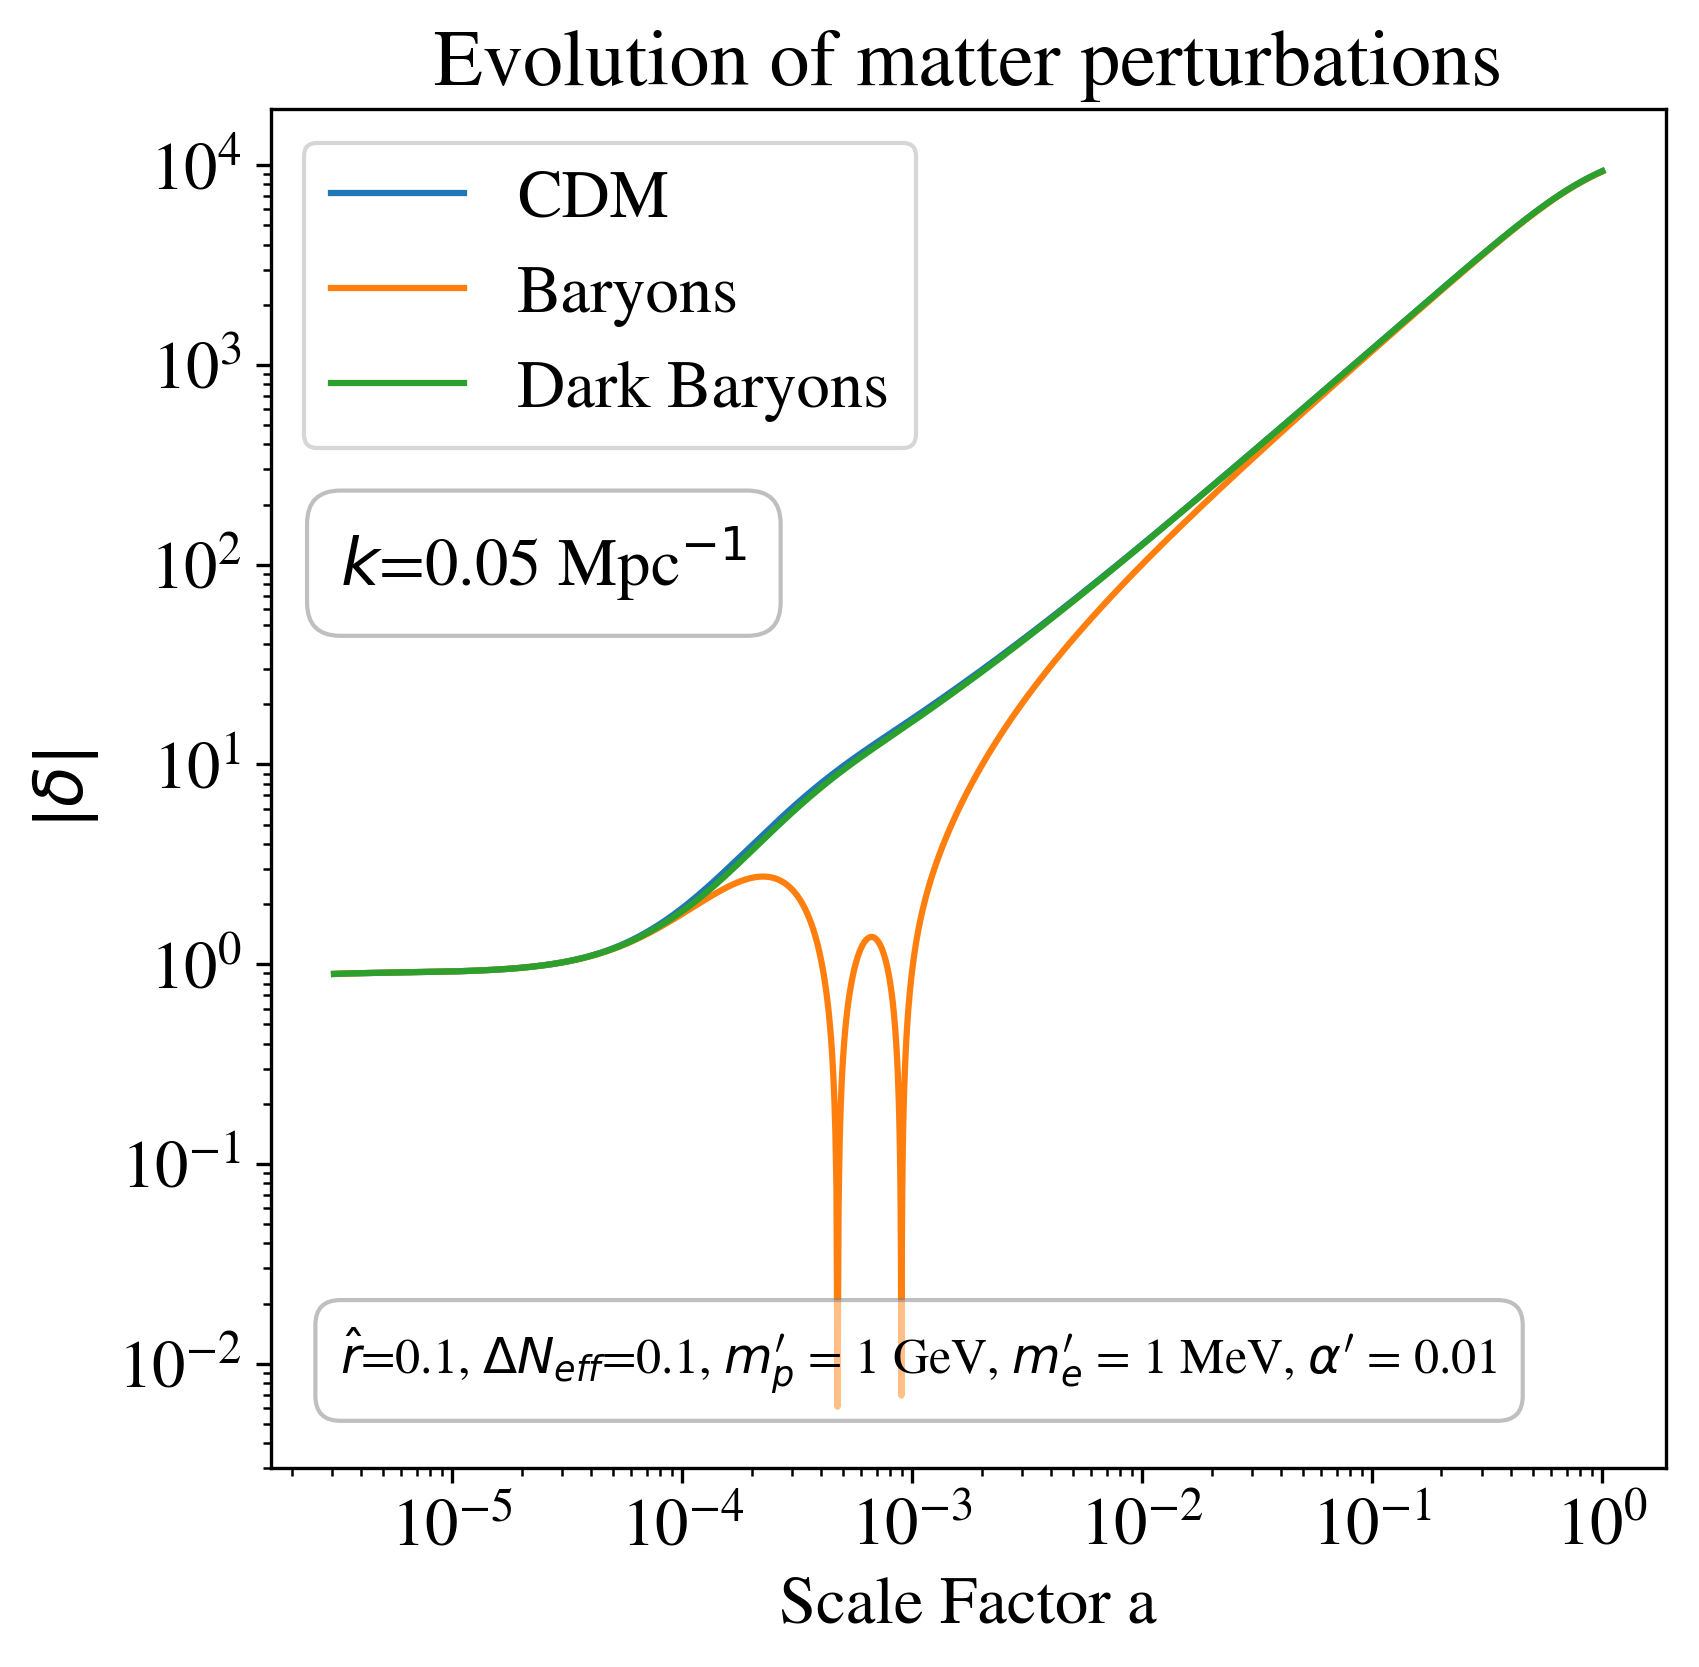

In [73]:



#plt.plot(one_k['a'],np.abs(one_k['delta_b']))
plt.figure(figsize=(6,6),dpi=300)
ax = plt.gca()

plt.plot(one_k['a'],np.abs(one_k['delta_cdm']),label='CDM')
plt.plot(one_k['a'],np.abs(one_k['delta_b']),label='Baryons')
plt.plot(one_k['a'],np.abs(one_k['delta_idm_dr']),label='Dark Baryons')

plt.xlabel('Scale Factor a')
plt.title('Evolution of matter perturbations')
plt.ylabel(r'$|\delta|$')
plt.legend()
plt.text(0.05,0.65,r'$k$=%g Mpc$^{-1}$'%(k),bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'),transform = ax.transAxes)
plt.text(0.05,0.07,'$\hat{r}$=%g, $\\Delta N_{eff}$=%g, $m_{p}\'$ = %g GeV, $m_{e}\'$ = %g MeV, $\\alpha\'$ = %g'%(r,deltaN,mp,1000*me,alpha),fontsize=12,bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'),transform = ax.transAxes)
plt.loglog()
plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/Perturbation_Evolution_k%g_r%g_deltaN%g_mp%gGeV_me%gMeV_alpha%g_20220515.png'%(k,r,deltaN,mp,1000*me,alpha),bbox_inches='tight')

In [84]:
k=0.2
settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                  'k_output_values':k,
                 'gauge':'newtonian',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0,
                   'Delta_N_twin':0.1,
                   'm_p_dark':mp,
                    'm_e_dark':me,
                    'alpha_dark':alpha}  
M = Class()
M.set(settings)
M.compute()
all_k = M.get_perturbations()  # this potentially constains scalars/tensors and all k values
#print (all_k['scalar'][0].keys())
#    
one_k = all_k['scalar'][0] 

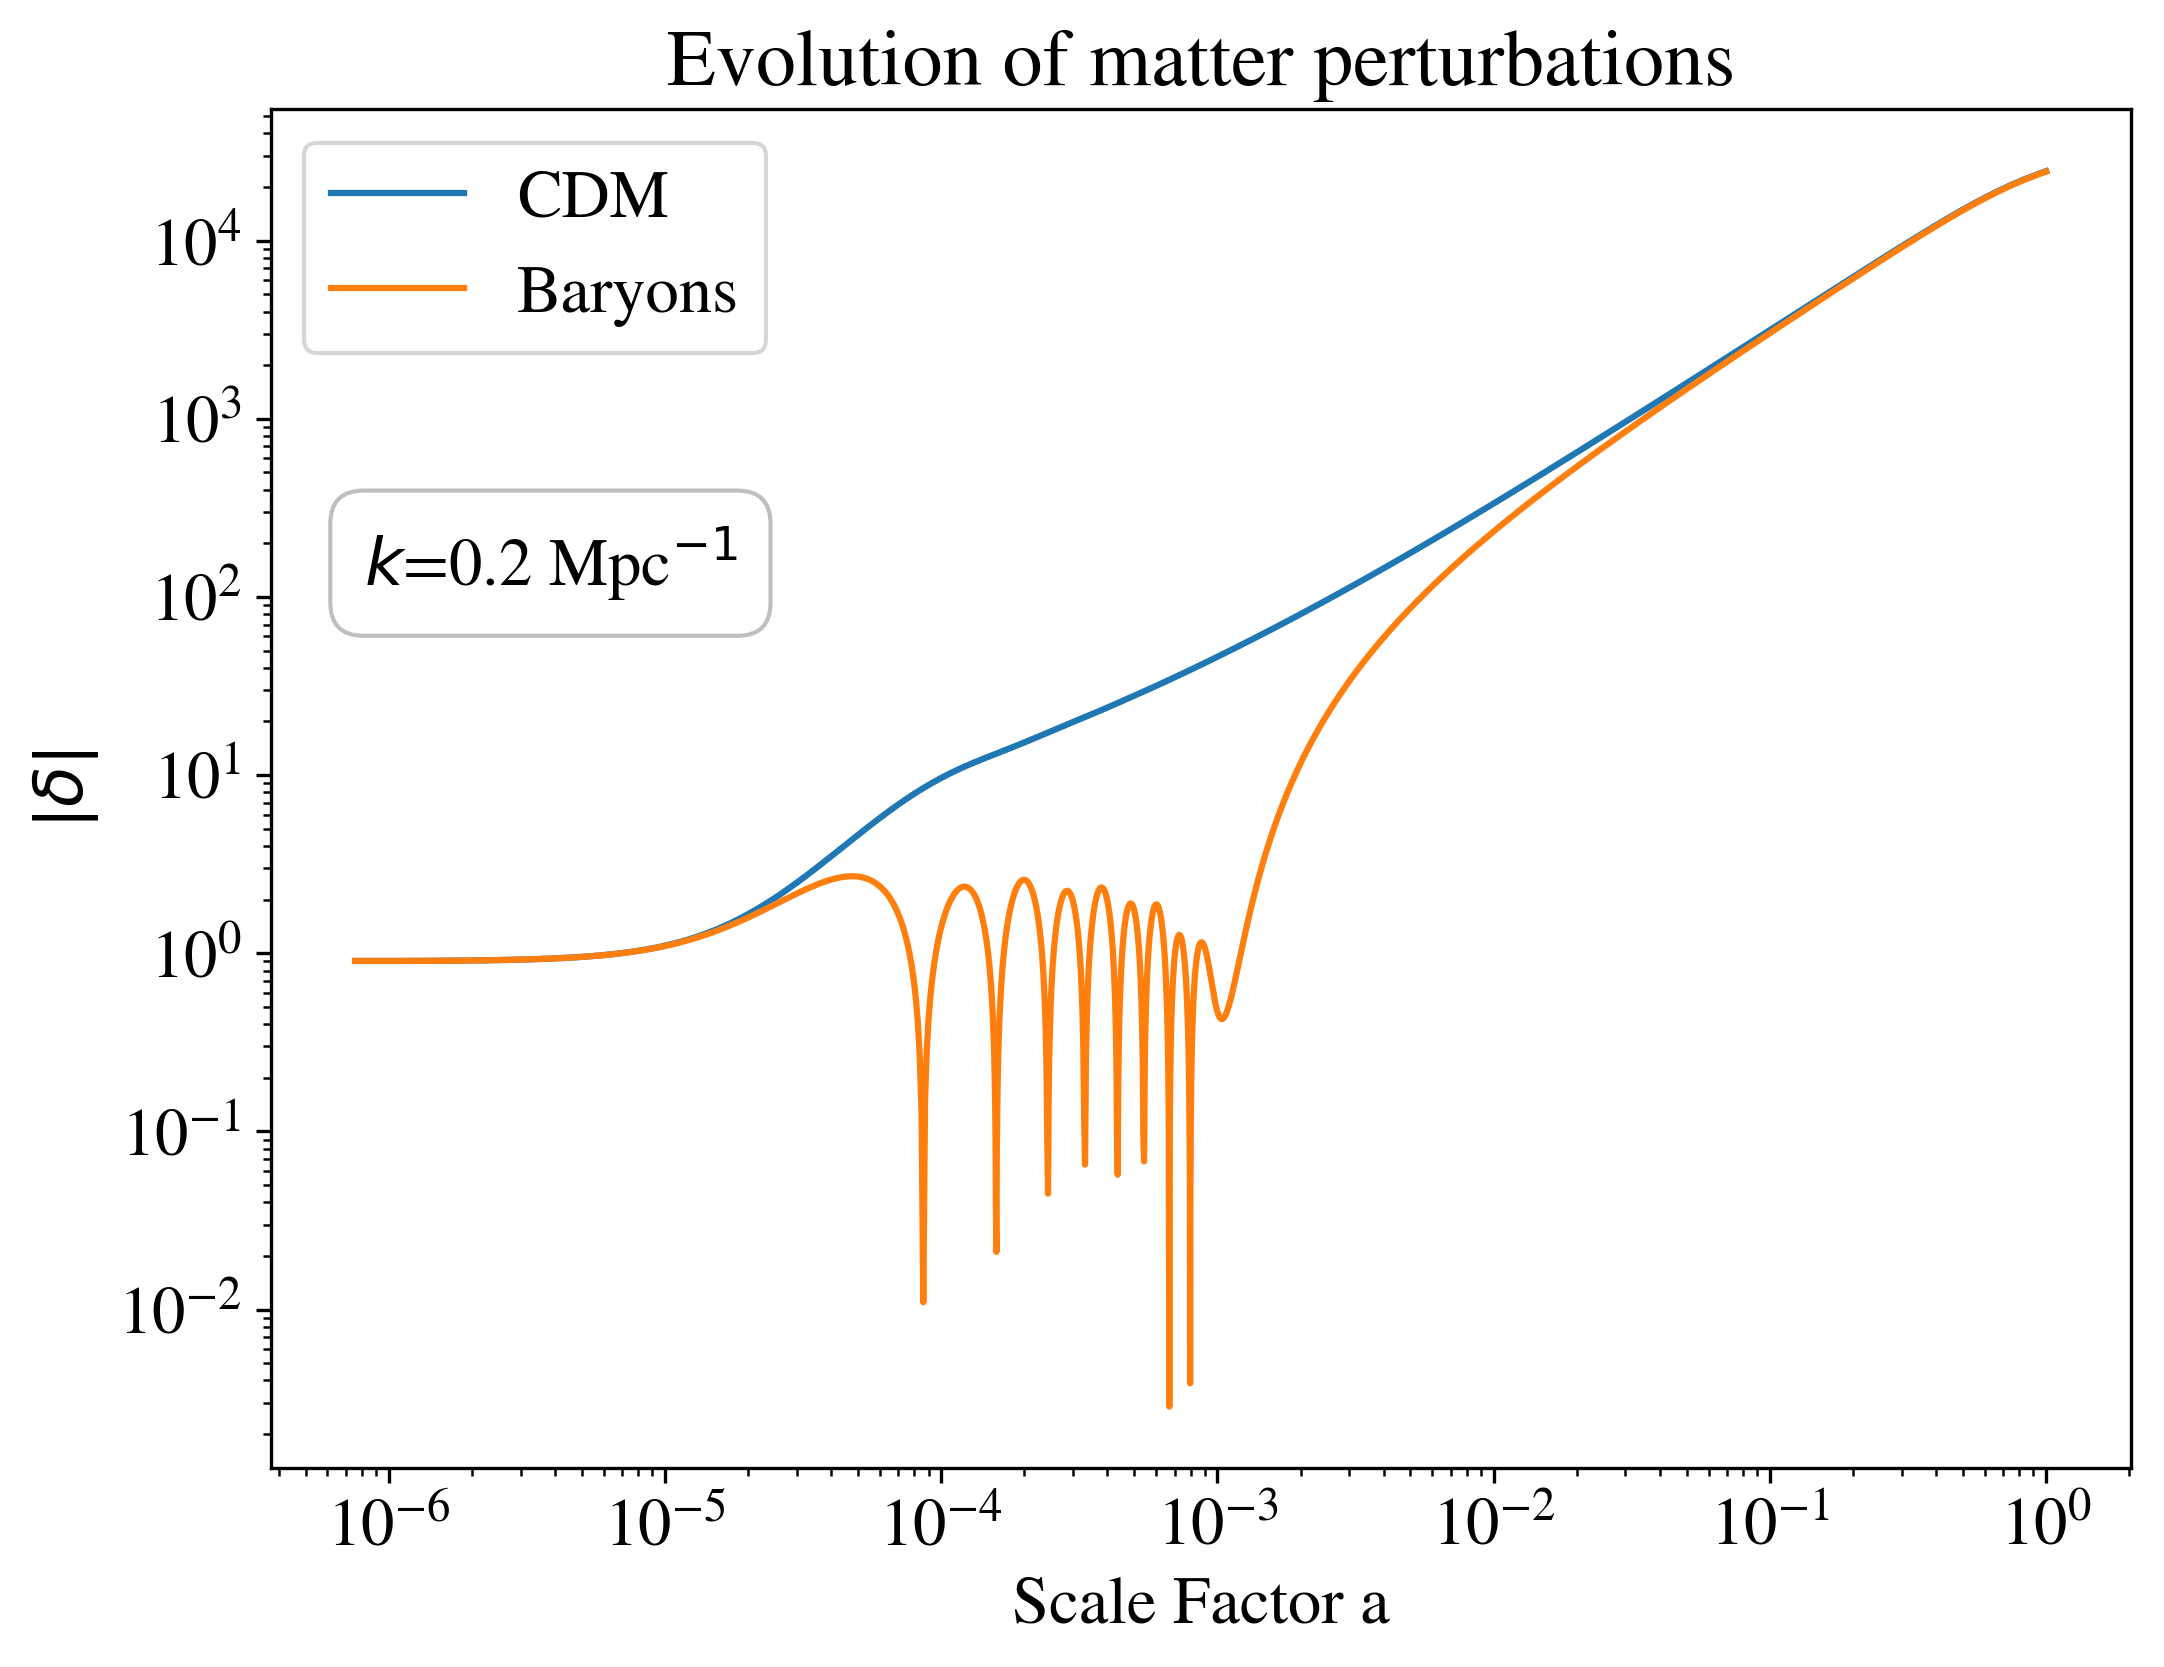

In [86]:
plt.figure(figsize=(8,6),dpi=300)
ax = plt.gca()

plt.plot(one_k['a'],np.abs(one_k['delta_cdm']),label='CDM')
plt.plot(one_k['a'],np.abs(one_k['delta_b']),label='Baryons')

plt.xlabel('Scale Factor a')
plt.title('Evolution of matter perturbations')
plt.ylabel(r'$|\delta|$')
plt.legend()
plt.text(0.05,0.65,r'$k$=%g Mpc$^{-1}$'%(k),bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'),transform = ax.transAxes)
#plt.text(0.05,0.07,'$\hat{r}$=%g, $\\Delta N_{eff}$=%g, $m_{p}\'$ = %g GeV, $m_{e}\'$ = %g MeV, $\\alpha\'$ = %g'%(r,deltaN,mp,1000*me,alpha),fontsize=12,bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'),transform = ax.transAxes)
plt.loglog()
plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/LCDM_Perturbation_Evolution_k%g_20220515.png'%(k),bbox_inches='tight')

# LCDM recombinatoin

# Recombination Plot

In [259]:
twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.01}  

M_twin1 = Class()
M_twin1.set(twin_settings)
M_twin1.compute()
thermo_twin1 = M_twin1.get_thermodynamics()

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.01,
                    'alpha_dark':.01}    

M_twin2 = Class()
M_twin2.set(twin_settings)
M_twin2.compute()
thermo_twin2 = M_twin2.get_thermodynamics()

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':10,
                    'm_e_dark':.001,
                    'alpha_dark':.01}     

M_twin3 = Class()
M_twin3.set(twin_settings)
M_twin3.compute()
thermo_twin3 = M_twin3.get_thermodynamics()


twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.3,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.01}     

M_twin4 = Class()
M_twin4.set(twin_settings)
M_twin4.compute()
thermo_twin4= M_twin4.get_thermodynamics()

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.02}     

M_twin5 = Class()
M_twin5.set(twin_settings)
M_twin5.compute()
thermo_twin5= M_twin5.get_thermodynamics()


twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.01,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.01}     

M_twin6 = Class()
M_twin6.set(twin_settings)
M_twin6.compute()
thermo_twin6= M_twin6.get_thermodynamics()

LambdaCDM_settings =  {'output':'tCl,pCl,lCl,mPk',
                                 'lensing':'yes',
                                   'omega_b':0.0224,
                                   'omega_cdm':0.119,
                                   '100*theta_s':1.04,
                                   'ln10^{10}A_s':3.05,
                                   'n_s':0.965,
                                   'tau_reio':0.0576,
                                   'N_ur':3.046,
                                   'r_all_twin':0,
                                   'Delta_N_twin':0.01,
                                   'm_p_dark':mp,
                                    'm_e_dark':me,
                                    'alpha_dark':alpha}   


M = Class()
M.set(LambdaCDM_settings)
M.compute()
thermo= M.get_thermodynamics()

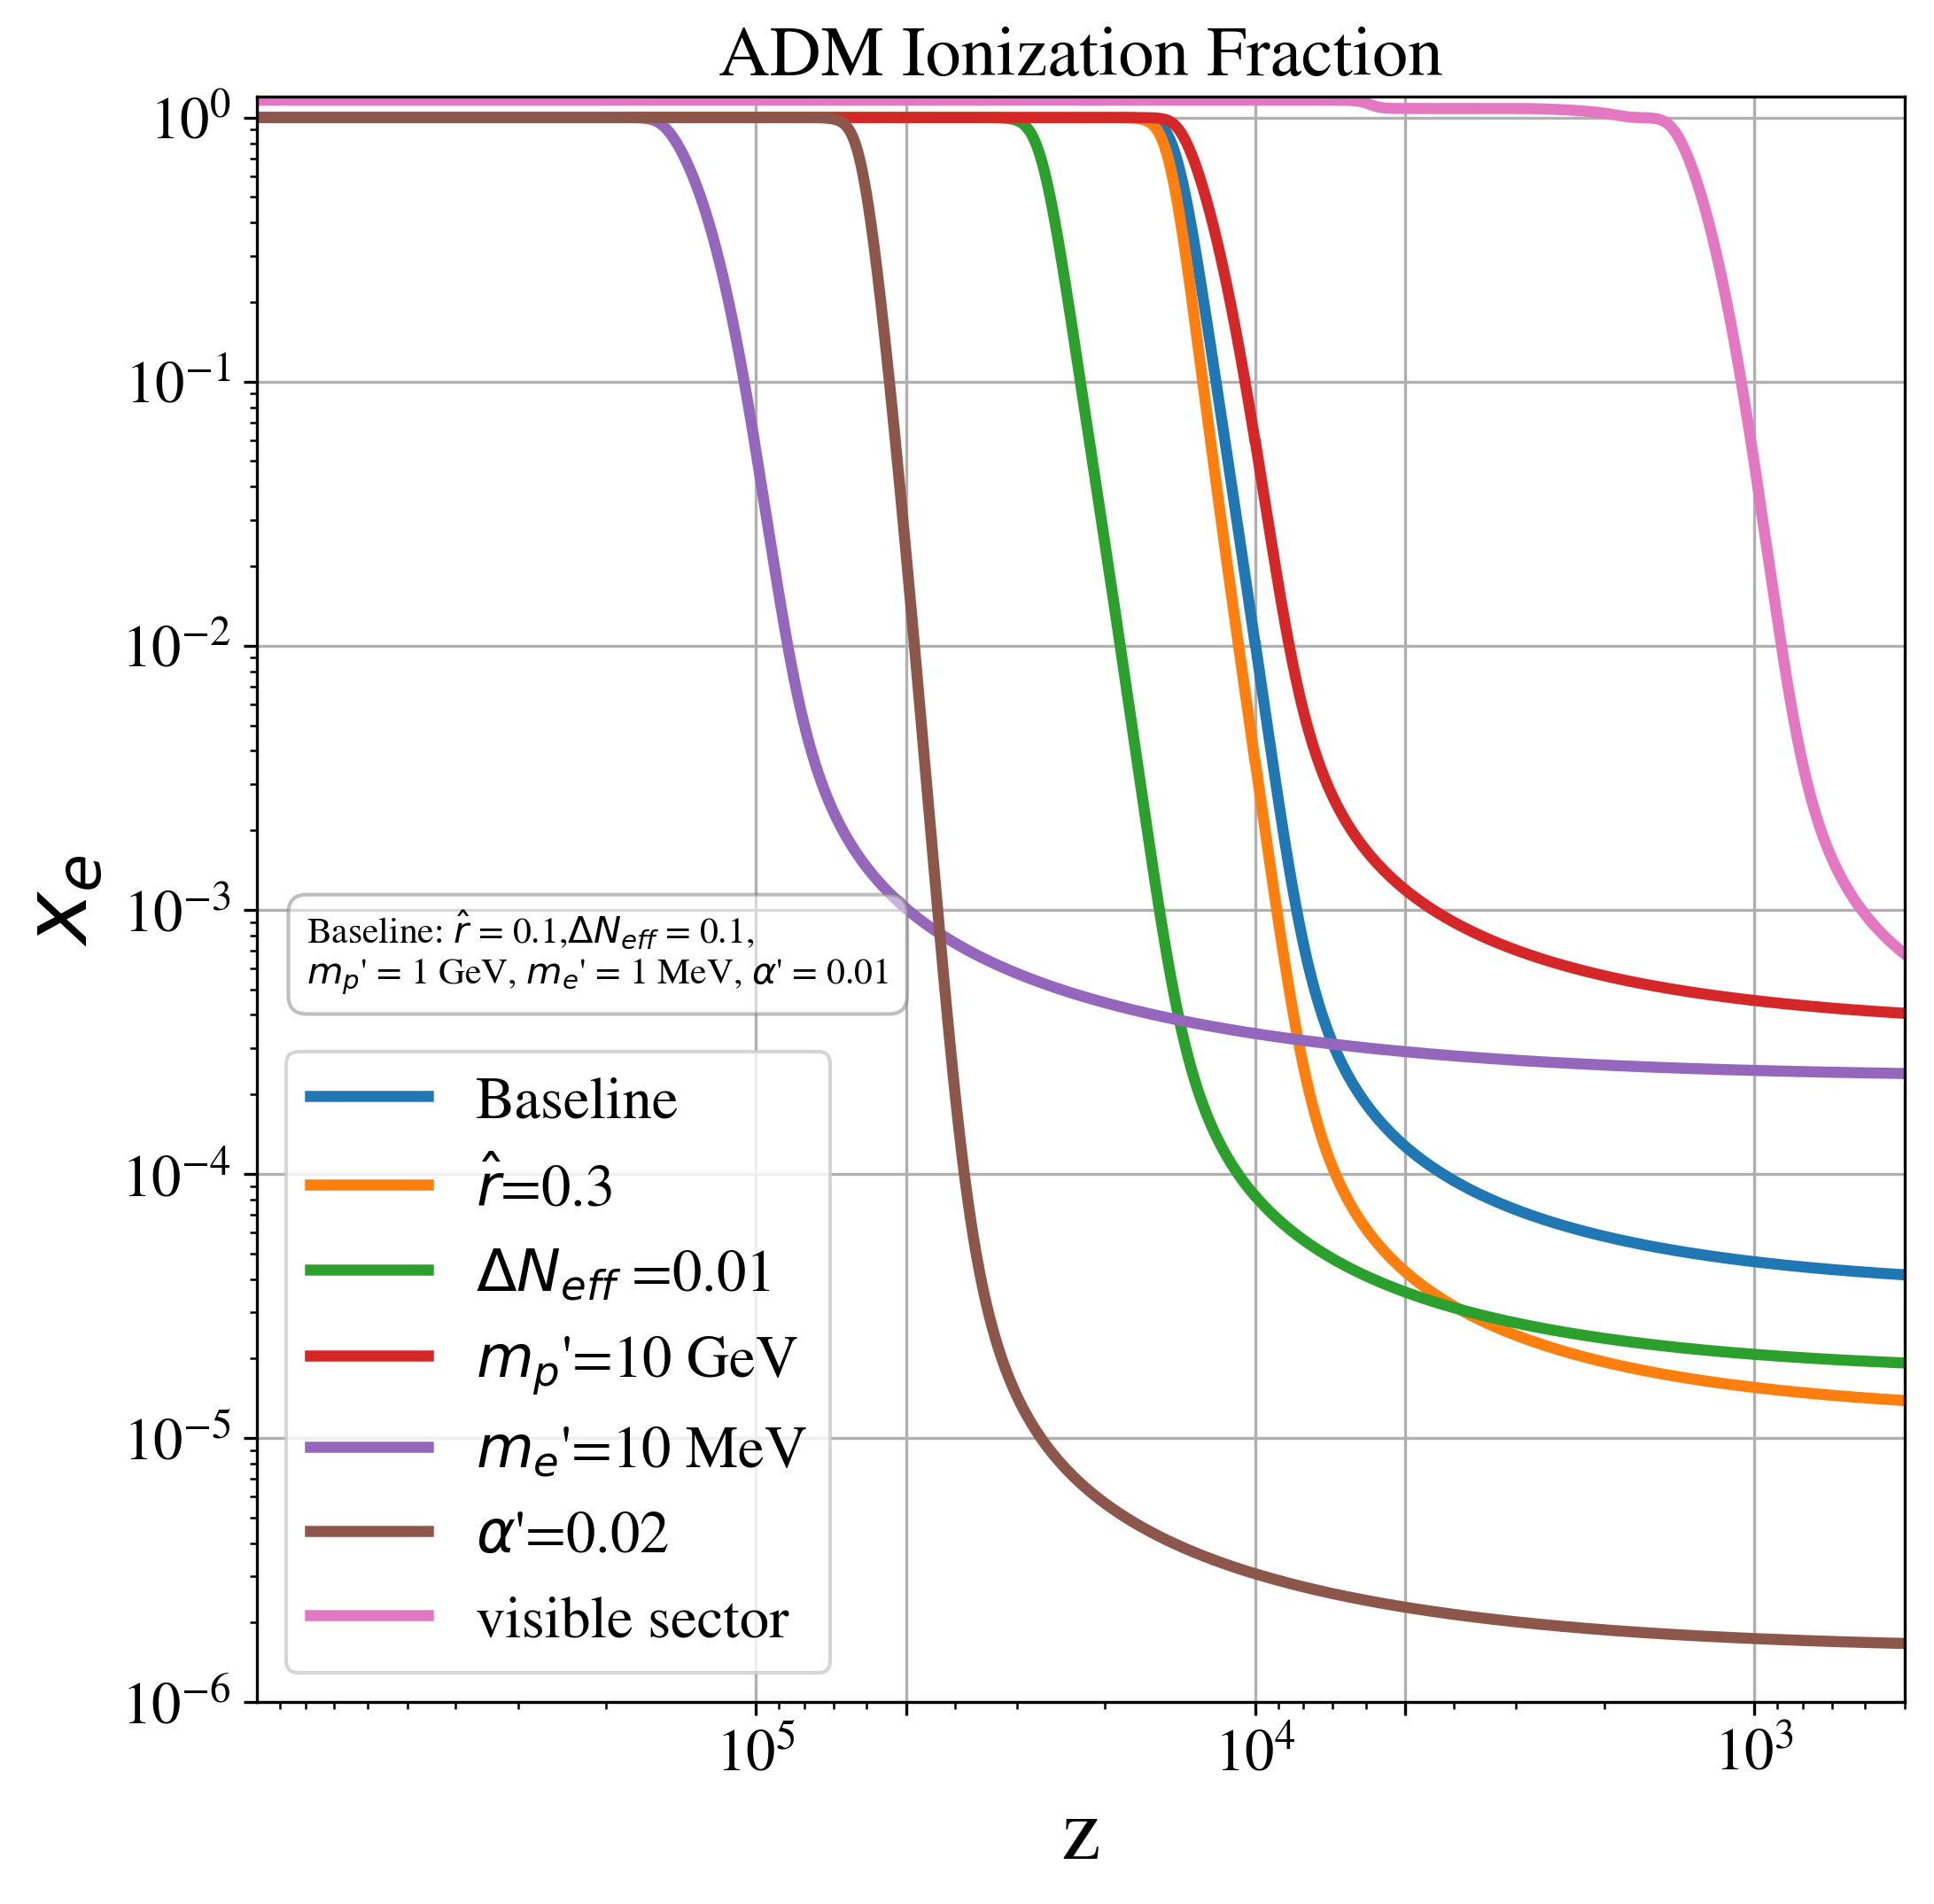

In [297]:
plt.figure(figsize=(8,8),dpi=300)
plt.semilogx(thermo_twin1['z'],thermo_twin1['x_e_twin'],label='Baseline',lw=3)#'0.1, 0.1, 1, 1, 0.01')
plt.semilogx(thermo_twin4['z'],thermo_twin4['x_e_twin'],label='$\hat{r}$=0.3',lw=3)#'0.3, 0.1, 1, 1, 0.01')
plt.semilogx(thermo_twin5['z'],thermo_twin6['x_e_twin'],label='$\\Delta N_{eff}$ =0.01',lw=3)#'0.1, 0.01, 1, 1, 0.01')
plt.semilogx(thermo_twin3['z'],thermo_twin3['x_e_twin'],label='$m_{p}$\'=10 GeV',lw=3)#'0.1, 0.1, 10, 1, 0.01')
plt.semilogx(thermo_twin2['z'],thermo_twin2['x_e_twin'],label='$m_{e}$\'=10 MeV',lw=3)#'0.1, 0.1, 1, 10, 0.01')
plt.semilogx(thermo_twin5['z'],thermo_twin5['x_e_twin'],label='$\\alpha$\'=0.02',lw=3)#'0.1, 0.1, 1, 1, 0.02')


plt.semilogx(thermo['z'],thermo['x_e'],label='visible sector',lw=3)
plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()

plt.xlim(5*10**2,10**6)
plt.ylim(10**-6,1.2)
plt.semilogy()
plt.gca().invert_xaxis()
plt.legend()
plt.text(10**5.9,10**-3.3,'Baseline: $\hat{r}$ = 0.1,$\\Delta N_{eff}$ = 0.1,\n$m_{p}$\' = 1 GeV, $m_{e}$\' = 1 MeV, $\\alpha$\' = 0.01',fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.xlabel('z',fontsize=24)
plt.ylabel('$x_e$',fontsize=24)
plt.title('ADM Ionization Fraction')
plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_Xe_Plot_20220514.png',bbox_inches='tight')

#  MpK plot

In [4]:
twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.01}  

M_twin1 = Class()
M_twin1.set(twin_settings)
M_twin1.compute()
thermo_twin1 = M_twin1.get_thermodynamics()

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.01,
                    'alpha_dark':.01}    

M_twin2 = Class()
M_twin2.set(twin_settings)
M_twin2.compute()
thermo_twin2 = M_twin2.get_thermodynamics()

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':10,
                    'm_e_dark':.001,
                    'alpha_dark':.01}     

M_twin3 = Class()
M_twin3.set(twin_settings)
M_twin3.compute()
thermo_twin3 = M_twin3.get_thermodynamics()


twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.3,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.01}     

M_twin4 = Class()
M_twin4.set(twin_settings)
M_twin4.compute()
thermo_twin4= M_twin4.get_thermodynamics()

twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.02}     

M_twin5 = Class()
M_twin5.set(twin_settings)
M_twin5.compute()
thermo_twin5= M_twin5.get_thermodynamics()


twin_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.01,
                   'm_p_dark':1,
                    'm_e_dark':.001,
                    'alpha_dark':.01}     

M_twin6 = Class()
M_twin6.set(twin_settings)
M_twin6.compute()
thermo_twin6= M_twin6.get_thermodynamics()



NameError: name 'mp' is not defined

In [5]:
mp=1
me=1
alpha=1
LambdaCDM_DeltaNeff1_settings =  {'output':'tCl,pCl,lCl,mPk',
                                 'lensing':'yes',
                                   'omega_b':0.0224,
                                   'omega_cdm':0.119,
                                   '100*theta_s':1.04,
                                   'ln10^{10}A_s':3.05,
                                   'n_s':0.965,
                                   'tau_reio':0.0576,
                                   'N_ur':3.046+0.1,
                                   'r_all_twin':0,
                                   'Delta_N_twin':0.01,
                                   'm_p_dark':mp,
                                    'm_e_dark':me,
                                    'alpha_dark':alpha}   


M1 = Class()
M1.set(LambdaCDM_DeltaNeff1_settings)
M1.compute()
thermo1= M1.get_thermodynamics()

LambdaCDM_DeltaNeff2_settings =  {'output':'tCl,pCl,lCl,mPk',
                                 'lensing':'yes',
                                   'omega_b':0.0224,
                                   'omega_cdm':0.119,
                                   '100*theta_s':1.04,
                                   'ln10^{10}A_s':3.05,
                                   'n_s':0.965,
                                   'tau_reio':0.0576,
                                   'N_ur':3.046+0.01,
                                   'r_all_twin':0,
                                   'Delta_N_twin':0.01,
                                   'm_p_dark':mp,
                                    'm_e_dark':me,
                                    'alpha_dark':alpha}   


M2 = Class()
M2.set(LambdaCDM_DeltaNeff2_settings)
M2.compute()
thermo2= M2.get_thermodynamics()

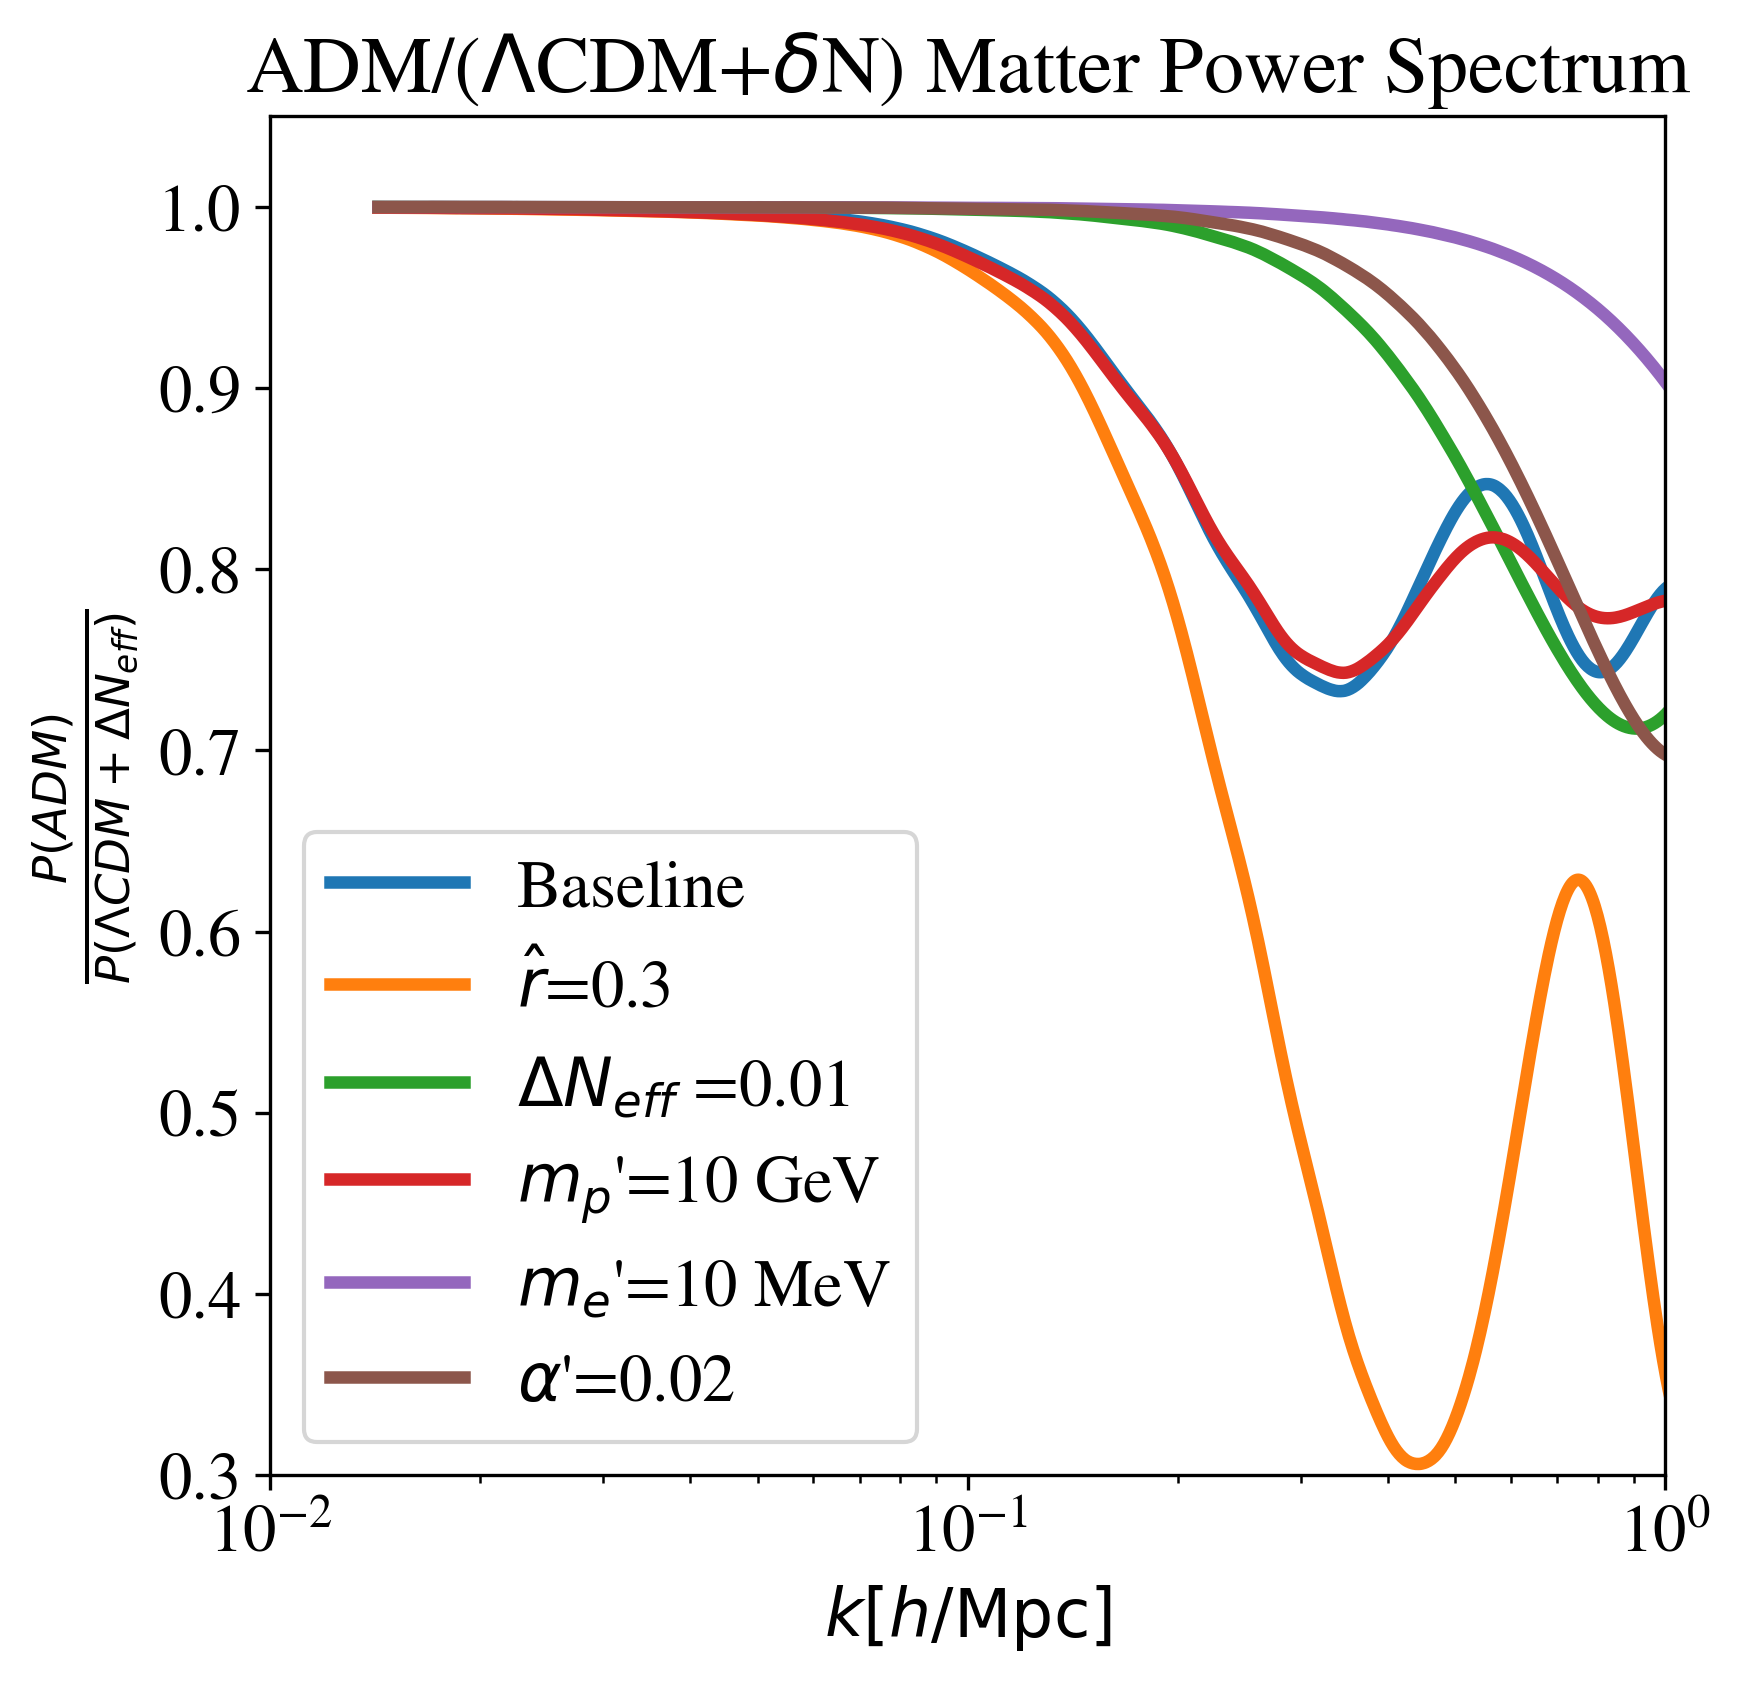

In [6]:
kk = np.logspace (-2,np.log10(1),1000)
Pk1 = []
Pk2 = []
Pk_twin1 = []
Pk_twin2 = []
Pk_twin3 = []
Pk_twin4 = []
Pk_twin5 = []
Pk_twin6 = []

for k in kk :
    Pk1.append (M1.pk (k ,0.) ) 
    Pk2.append (M2.pk (k ,0.) ) 
    Pk_twin1.append (M_twin1.pk (k ,0.) )
    Pk_twin2.append (M_twin2.pk (k ,0.) )
    Pk_twin3.append (M_twin3.pk (k ,0.) )
    Pk_twin4.append (M_twin4.pk (k ,0.) )
    Pk_twin5.append (M_twin5.pk (k ,0.) )
    Pk_twin6.append (M_twin6.pk (k ,0.) )


plt.figure(figsize=(6,6),dpi=300)
plt.xscale ('log')
plt.xlim (kk[0],kk[ -1])
plt.ylim(0.3,1.05);
plt.xlabel (r'$k [h/\mathrm { Mpc }]$')
plt.ylabel (r'$\frac{P(ADM)}{P(\Lambda CDM + \Delta N_{eff})}$')

plt.plot(kk/0.7,np.array(Pk_twin1)/np.array(Pk1),label='Baseline',lw=3)
plt.plot(kk/0.7,np.array(Pk_twin4)/np.array(Pk1),label='$\hat{r}$=0.3',lw=3)
plt.plot(kk/0.7,np.array(Pk_twin6)/np.array(Pk2),label='$\\Delta N_{eff}$ =0.01',lw=3)
plt.plot(kk/0.7,np.array(Pk_twin3)/np.array(Pk1),label='$m_{p}$\'=10 GeV',lw=3)
plt.plot(kk/0.7,np.array(Pk_twin2)/np.array(Pk1),label='$m_{e}$\'=10 MeV',lw=3)
plt.plot(kk/0.7,np.array(Pk_twin5)/np.array(Pk1),label='$\\alpha$\'=0.02',lw=3)




plt.legend()
plt.title('ADM/($\\Lambda$CDM+$\\delta$N) Matter Power Spectrum')

plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_2.9_mPk_20220708.png',bbox_inches='tight')


# CMB

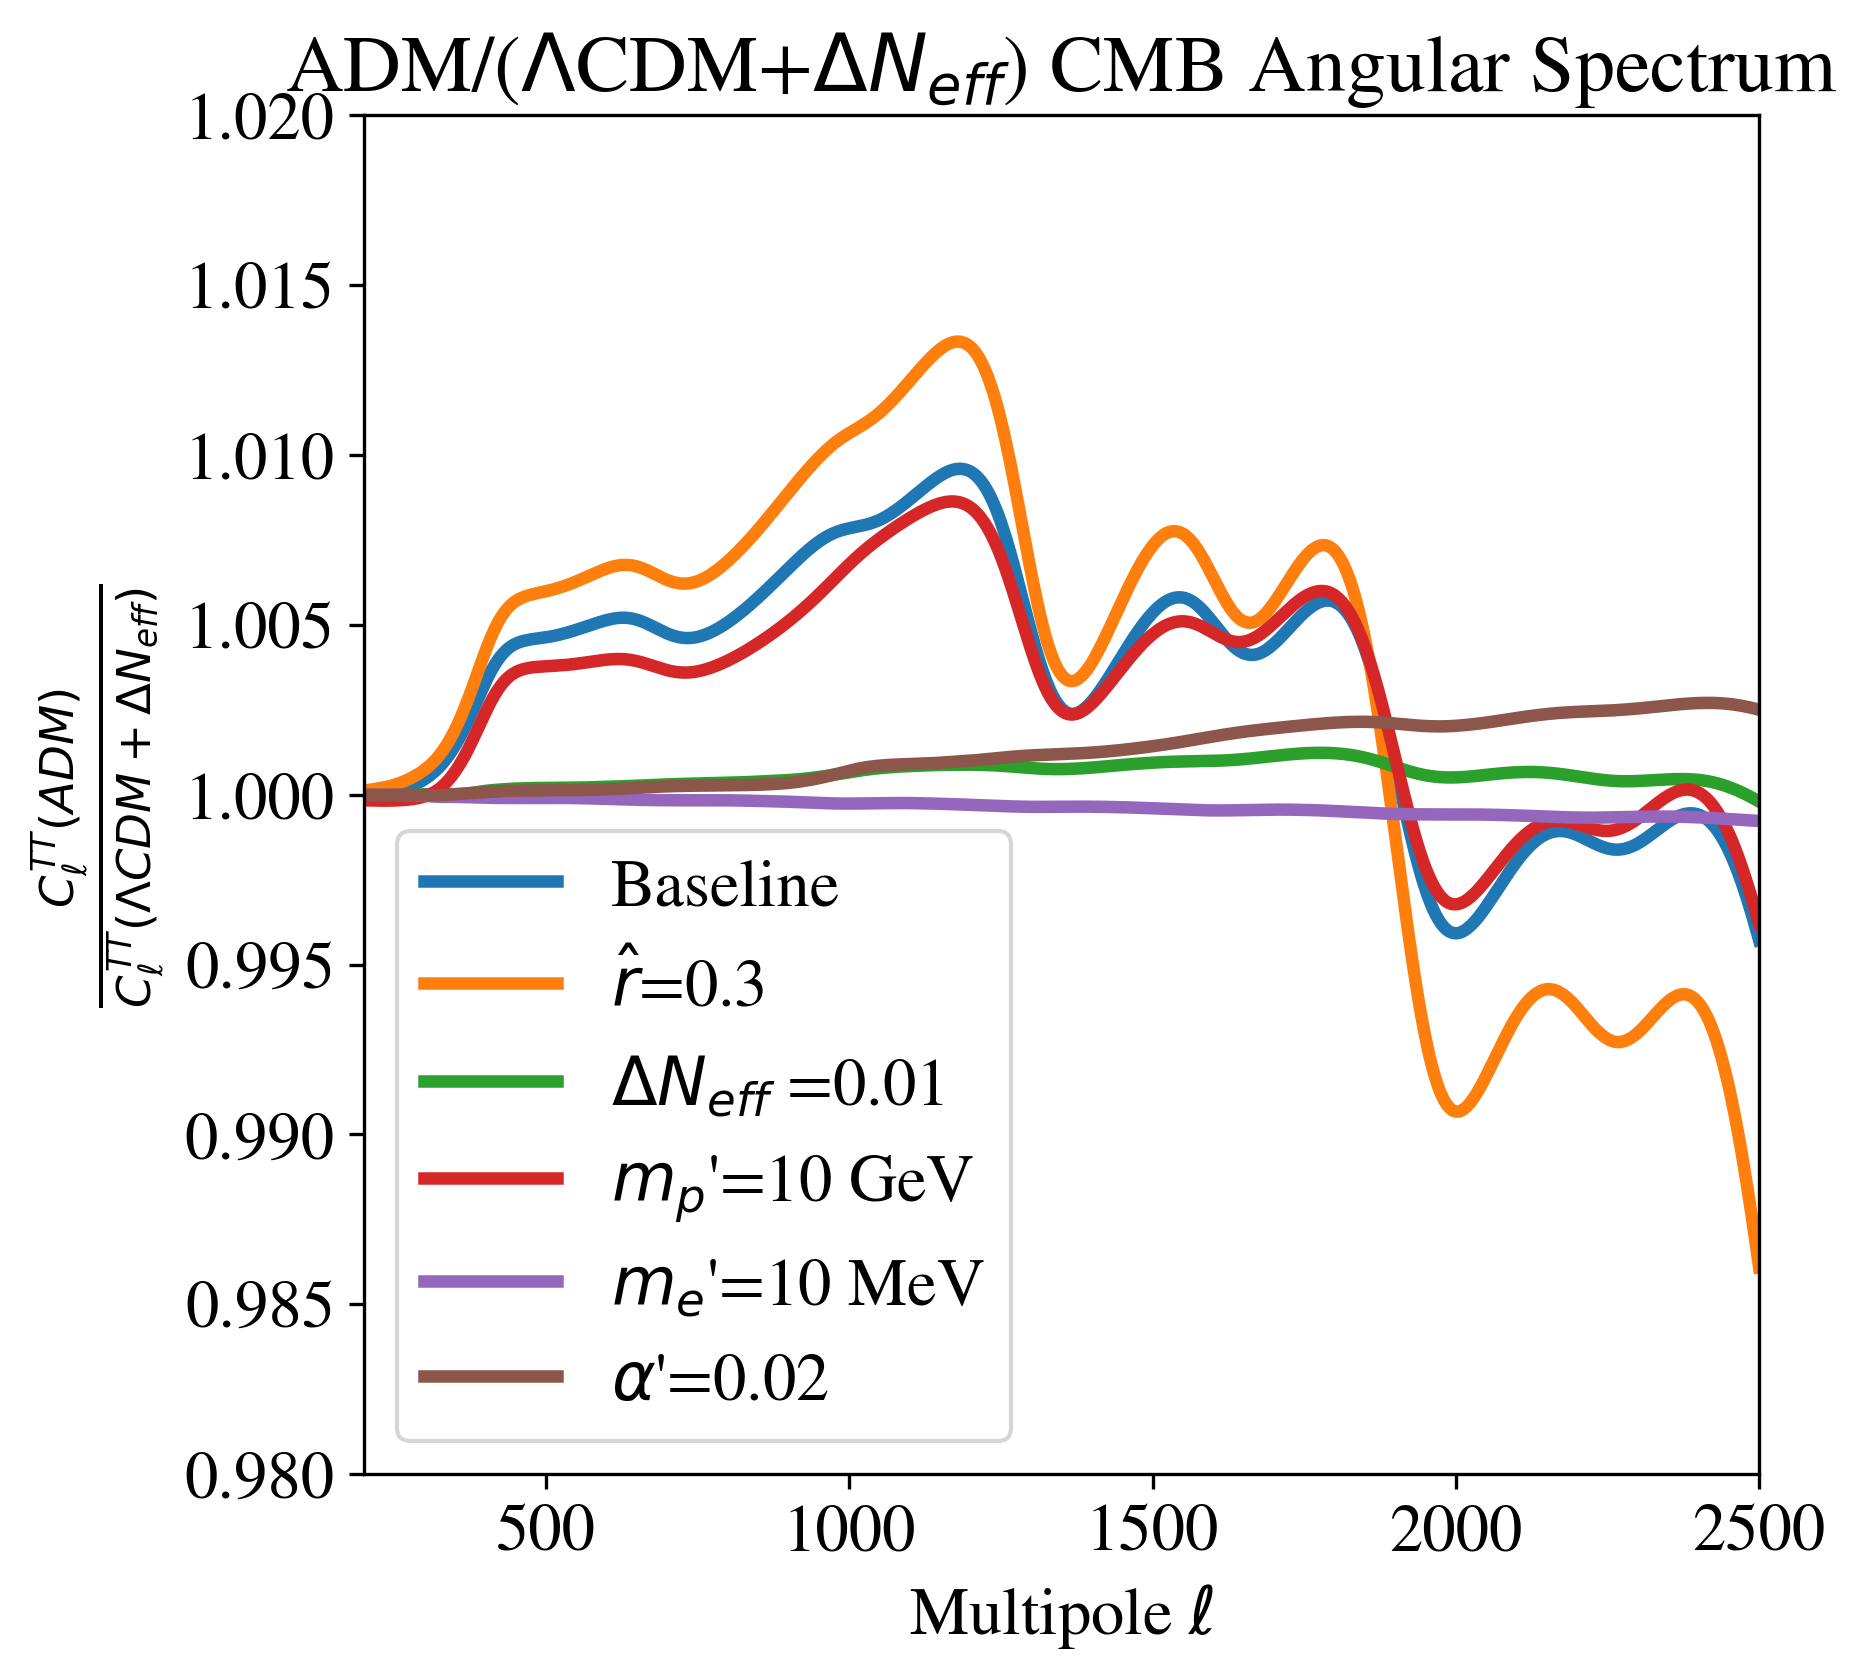

In [7]:
clM_twin1 = M_twin1.lensed_cl(2500)
ll_twin1= clM_twin1['ell'][2:]
clTT_twin1 = clM_twin1['tt'][2:]

clM_twin2 = M_twin2.lensed_cl(2500)
ll_twin2= clM_twin2['ell'][2:]
clTT_twin2 = clM_twin2['tt'][2:]

clM_twin3 = M_twin3.lensed_cl(2500)
ll_twin3= clM_twin3['ell'][2:]
clTT_twin3 = clM_twin3['tt'][2:]

clM_twin4 = M_twin4.lensed_cl(2500)
ll_twin4= clM_twin4['ell'][2:]
clTT_twin4 = clM_twin4['tt'][2:]

clM_twin5 = M_twin5.lensed_cl(2500)
ll_twin5= clM_twin5['ell'][2:]
clTT_twin5 = clM_twin5['tt'][2:]

clM_twin6 = M_twin6.lensed_cl(2500)
ll_twin6= clM_twin6['ell'][2:]
clTT_twin6 = clM_twin6['tt'][2:]

clM1 = M1.lensed_cl(2500)
ll1= clM1['ell'][2:]
clTT1 = clM1['tt'][2:]

clM2 = M2.lensed_cl(2500)
ll22= clM2['ell'][2:]
clTT2 = clM2['tt'][2:]

plt.figure(figsize=(6,6),dpi=300)
plt.xlim(200,2500)
plt.plot(ll_twin1,clTT_twin1/clTT1,label='Baseline',lw=3)
plt.plot(ll_twin4,clTT_twin4/clTT1,label='$\hat{r}$=0.3',lw=3)
plt.plot(ll_twin6,clTT_twin6/clTT2,label='$\\Delta N_{eff}$ =0.01',lw=3)
plt.plot(ll_twin3,clTT_twin3/clTT1,label='$m_{p}$\'=10 GeV',lw=3)
plt.plot(ll_twin2,clTT_twin2/clTT1,label='$m_{e}$\'=10 MeV',lw=3)
plt.plot(ll_twin5,clTT_twin5/clTT1,label='$\\alpha$\'=0.02',lw=3)

plt.ylim(0.98,1.02)
plt.legend()

plt.xlabel('Multipole $\ell$')
plt.ylabel(r'$\frac{C^{TT}_{\ell}(ADM)}{C_{\ell}^{TT}(\Lambda CDM + \Delta N_{eff})}$')
plt.title(r'ADM/($\Lambda$CDM+$\Delta N_{eff}$) CMB Angular Spectrum')
plt.savefig('/project/d/dcurtin/jpbarron/ADM/plots/cosmo_observables/ADM_2.9_ClTT_20220708.png',bbox_inches='tight')


# Debugging


In [4]:
for r_all_twin in [0.24]:
    for Delta_N_twin in [0.04]:#np.logspace(-1,np.log10(0.5),5):
        for m_p_dark in [1]:#np.logspace(0,2,25):
            for m_e_dark in [.001]:#np.logspace(-4,-1,3):
                for alpha_dark in [.01]:#np.logspace(-3,-1,3):
                    twin_settings = {'output':'mPk, tCl',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':r_all_twin,
                   'Delta_N_twin':Delta_N_twin,
                   'm_p_dark':m_p_dark,
                    'm_e_dark':m_e_dark,
                    'alpha_dark':alpha_dark}  

                    M = Class()
                    M.set(twin_settings)
                    try:
                        M.compute()
                    except:
                        print('r_all_twin = %3e, Delta_N_twin = %3e, m_p_dark = %3e, m_e_dark = %3e, alpha_dark = %3e'%(r_all_twin,Delta_N_twin,m_p_dark,m_e_dark,alpha_dark))

In [5]:
twin_settings = {'output':'mPk, tCl',
'omega_b':0.02230395,
'omega_cdm':0.1210634,
'100*theta_s':1.041942,
'ln10^{10}A_s':3.041531,
'n_s':0.962755,
'tau_reio':0.05554814,
'YHe_twin':0,
'r_all_twin':0.2337705,
'Delta_N_twin':0.03953538,
'm_p_dark':1,
'm_e_dark':0.001,
'alpha_dark':0.01}  
M = Class()
M.set(twin_settings)
M.compute()

In [67]:
#all values of r_all_twin seem to be ok?
#delta_n_twin larger values seem to be bad if m_p_dark is also large. Even delta_N_twin = 0.1 gives errors if m_p_dark is 25 GeV, but 20 GeV is ok.
#And then delta_N_twin = 0.3 is bad for m_p_dark of 14 GeV. So the larger m_p_dark, the lower the highest permissible value of deltaN_dark.
#The above is for m_e_dark = 1 MeV, alpha_Dark = 10^-2. 

#m_e_dark: Large values give very early recombination, but not errors.  

#Small? m_e seems to be bad for alpha_dark = 0.02. I'm not sure. 

#For r_twin = .1, delta=0.1, m_p = 1, m_e = 10^-3, apparently only alpha-dark around 10^-2 is ok? And even a factor of two smaller or 5 larger
#is not permissible. Apparently literally only the range from 0.007 to slightly less than 0.02 is ok. 
#The same constraint applies for m_p = 10 GeV. f

In [18]:
settings = {'output':'mPk,tCl','h':0.66,'omega_b':0.02203,'omega_cdm':0.119,'n_s':0.9619,'A_s':2.215e-9,'tau_reio':0.0576,'YHe_twin':0,'r_all_twin':0.1,'Delta_N_twin':0.1,'m_p_dark':1,'m_e_dark':0.001,'alpha_dark':0.1}
M=Class()
M.set(settings)
M.compute()

CosmoComputationError: 

Error in Class: thermodynamics_init(L:439) :error in thermodynamics_calculate_remaining_quantities(ppr,pba,pth,pvecback);
=>thermodynamics_calculate_remaining_quantities(L:1941) :error in thermodynamics_calculate_twin_quantities(ppr,pba,pth,pvecback);
=>thermodynamics_calculate_twin_quantities(L:4121) :error in thermodynamics_recombination_twin(ppr,pba,pth,pvecback);
=>thermodynamics_recombination_twin(L:4336) :error in generic_integrator(thermodynamics_derivs_twin, zstart, zend, y_twin, &tpaw, ppr->tol_thermo_integration, ppr->smallest_allowed_variation, &gi);
=>generic_integrator(L:128) :error; Too many integration steps needed within interval [2.10736e+06 : 2.10474e+06],
 the system of equations is probably buggy or featuring a discontinuity

In [20]:
for r_all_twin in [0.1]:
    for Delta_N_twin in [0.1]:#np.logspace(-1,np.log10(0.5),5):
        for m_p_dark in [1]:#np.logspace(0,2,25):
            for m_e_dark in [0.001]:#np.logspace(-4,-1,3):
                for alpha_dark in [0.08]:#np.logspace(-3,-1,3):
                    twin_settings = {'output':'mPk, tCl',
                   'omega_b':0.0224,
                   'omega_cdm':0.119,
                   '100*theta_s':1.04,
                   'ln10^{10}A_s':3.05,
                   'n_s':0.965,
                   'tau_reio':0.0576,
                    'YHe_twin':0,
                   'r_all_twin':r_all_twin,
                   'Delta_N_twin':Delta_N_twin,
                   'm_p_dark':m_p_dark,
                    'm_e_dark':m_e_dark,
                    'alpha_dark':alpha_dark}  

                    M = Class()
                    M.set(twin_settings)
                    M.compute()
                    derived = M.get_current_derived_parameters(['tau_rec','conformal_age'])
                    thermo = M.get_thermodynamics()



CosmoComputationError: 

Error in Class: background_init(L:850) :condition (pba->shooting_failed == _TRUE_) is true; Shooting failed, try optimising input_get_guess(). Error message:

input_shooting(L:656) :error in input_find_root(&xzero, &fevals, ppr->tol_shooting_deltax_rel, &fzw, errmsg);
=>input_find_root(L:838) :error in input_fzerofun_1d(x1, pfzw, &f1, errmsg);
=>input_fzerofun_1d(L:911) :error in input_try_unknown_parameters(&input, 1, pfzw, output, error_message);
=>input_try_unknown_parameters(L:1285) :error in thermodynamics_init(&pr,&ba,&th);
=>thermodynamics_init(L:439) :error in thermodynamics_calculate_remaining_quantities(ppr,pba,pth,pvecback);
=>thermodynamics_calculate_remaining_quantities(L:1941) :error in thermodynamics_calculate_twin_quantities(ppr,pba,pth,pvecback);
=>thermodynamics_calculate_twin_quantities(L:4121) :error in thermodynamics_recombination_twin(ppr,pba,pth,pvecback);
=>thermodynamics_recombination_twin(L:4337) :error in generic_integrator(thermodynamics_derivs_twin, zstart, zend, y_twin, &tpaw, ppr->tol_thermo_integration, ppr->smallest_allowed_variation, &gi);
=>generic_integrator(L:128) :error; Too many integration steps needed within interval [1.19389e+06 : 1.17911e+06],
 the system of equations is probably buggy or featuring a discontinuity

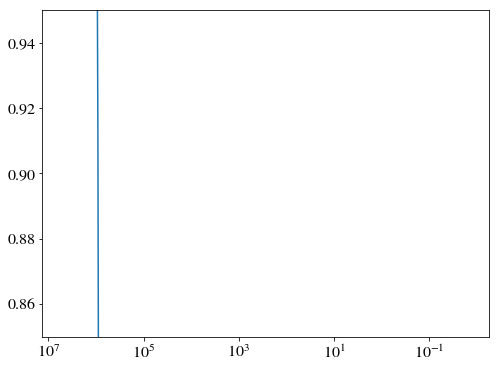

In [19]:
plt.scatter(thermo['z'],thermo['x_e_twin'],label='r=%g,dN=%g,mpdark=%g GeV,medark=%g GeV,alpha_dark=%g'%(r_all_twin,Delta_N_twin,m_p_dark,m_e_dark,alpha_dark))
#plt.semilogx(thermo['z'],thermo['x_e'],label='visible sector')

#plt.gca().set_xticks(ticks=[5*10**6,10**6,10**5,5*10**4,10**4,5*10**3,10**3])
#plt.grid()
#plt.xlim(10**5,5*10**6)
#plt.ylim(0.989,0.991)
plt.ylim(0.85,0.95)
#plt.semilogy()

#plt.xlim(6.48*10**5,6.55*10**5)
#plt.xlim(4.9*10**6,5*10**6)
#plt.ylim(0,0.01)
#plt.ylim(0.989,0.991)
plt.gca().invert_xaxis()
#plt.legend()

In [7]:
#Try computing at alpha1, alpha2. 
#If both don't work, set new alpha1=alpha1-0.1, and new alpha2= old alpha1. 
#If alpha2 doesn't work but alpha1 does: Set alpha2 = (alpha2+alpha1)/2 and try again. 
#If alpha1 and alpha2 work, make new alpha1 = alpha2, and new alpha2 = 2 * alpha1 - alpha2. 


def test_alpha(r,deltaN,mp,me,alpha):
    try:
        settings = {'output':'mPk',
           'omega_b':0.0224,
           'omega_cdm':0.119,
           '100*theta_s':1.04,
           'ln10^{10}A_s':3.05,
           'n_s':0.965,
           'tau_reio':0.0576,
            'YHe_twin':0,
           'r_all_twin':r,
           'Delta_N_twin':deltaN,
           'm_p_dark':mp,
            'm_e_dark':me,
            'alpha_dark':alpha}
        M = Class()
        M.set(settings)
        M.compute()
    except:
        return False
    else:
        return True

def find_max_alpha(r,deltaN,mp,me):

    alpha_guess_1 = 0.05
    alpha_guess_2 = 0.1

    
    good_1 = test_alpha(r,deltaN,mp,me,alpha_guess_1)
    
    good_2 = test_alpha(r,deltaN,mp,me,alpha_guess_2)
    

    while not (((alpha_guess_2 - alpha_guess_1)/(alpha_guess_2) < 0.01 ) and good_1):
        if (not good_1) and (not good_2):
            alpha_guess_2 = alpha_guess_1
            alpha_guess_1 = alpha_guess_1 / 2

        elif (good_1) and (not good_2):
            alpha_guess_2 = (alpha_guess_2 + alpha_guess_1) / 2

        elif (not good_1) and (good_2):
            print('This should not be able to happen, guess_1 should be < guess_2')

        elif good_1 and good_2: 
            alpha_guess_1_new = alpha_guess_2
            alpha_guess_2_new = 2 * alpha_guess_2 - alpha_guess_1
            alpha_guess_1 = alpha_guess_1_new
            alpha_guess_2 = alpha_guess_2_new

        good_1 = test_alpha(r,deltaN,mp,me,alpha_guess_1)

        good_2 = test_alpha(r,deltaN,mp,me,alpha_guess_2)

    return alpha_guess_1


In [1]:
#July 11
for r in [0.1]:
    for Delta_N in [0.1]:#np.logspace(-1,np.log10(0.5),5):
        for m_p_dark in [1]:#np.logspace(0,2,25):
            for m_e_dark in [0.001]:#np.logspace(-4,-1,3):
                for alpha_dark in [0.01]:
                    good=test_alpha(r,Delta_N,m_p_dark,m_e_dark,alpha_dark)
                    if good:
                        print('good')
                    if not good:
                        print(r,Delta_N,m_p_dark,m_e_dark,alpha_dark)

NameError: name 'test_alpha' is not defined

In [ ]:
#List of critical temperatures where x_e = 0.99. 
#For me = np.array([0.00005,0.0001,0.0005,0.0007,0.0008,0.001,0.0015,0.002,0.003])

In [70]:
def lymanalpha(T,me,alpha):
    #In natural units
    epsilon_H = me * alpha**2 / 2
    return 0.448 * ((64 * np.pi)/(np.sqrt(27 * np.pi))) * (alpha**2/me**2)*(epsilon_H/T)**(1/2) * np.log(epsilon_H/T)

def beta(T,me,alpha):
    epsilon_H = me * alpha**2 / 2
    return (lymanalpha(T,me,alpha)/4) * (me * T / (2*np.pi))**(3/2) * np.exp(-epsilon_H/(4*T)) 

def Lambda_2gamma(me,alpha):
    #In 1/sec
    return 8.227 * (me/511000) * (alpha/.00729735)**8



1.0722128364408941e-12

In [14]:
params_list = [[0.1,0.1,0.1,0.0001],[0.1,0.1,0.1,0.001],[0.1,0.1,0.1,0.01],[0.1,0.1,10,0.0001],[0.1,0.1,10,0.001],[0.1,0.1,10,0.01],[0.1,0.01,1,0.001],[0.1,0.3,1,0.001],[0.1,0.1,1,0.0001],[0.1,0.1,1,0.001],[0.1,0.1,1,0.01],[0.1,0.1,1,0.05]]
for params in params_list:
    alpha=find_max_alpha(*params)
    params.append(alpha)
    f.write(','.join([str(x) for x in params]))
    

1 2 3


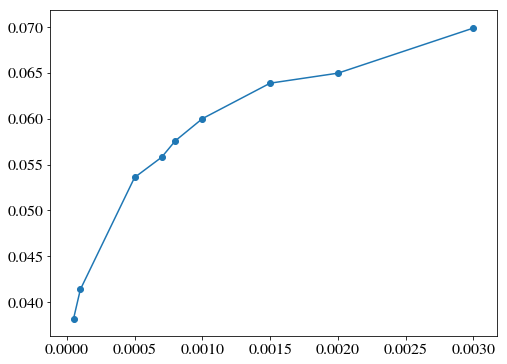

In [78]:
x = np.array([0.00005,0.0001,0.0005,0.0007,0.0008,0.001,0.0015,0.002,0.003])
y = np.array([0.0382,0.04138,0.05359,0.0558,0.05758,0.0600,0.06387,0.06496,0.06988])
plt.plot(x,y)
plt.scatter(x,y)

find_max_alpha(0.1,0.1,1,0.001)

In [ ]:
#The highest permissible alpha increases with m_e_dark. But it's not super sensitive - ie a large change in m_e only changes the permissible
#alpha by a little bit. 

In [ ]:
#Error if parameters are such that recombination is in progress at z_initial, 5*10**6. ie too large alpha, 0.06 to 0.019. (Of course this depends on me and mp, in this case it's 1 MeV 1 GeV, deltaN 0.1 r 0.1)
#But for alpha=0.06, the diffeq solver breaks at z=7*10^5, which is where x_e=0.99, the switch from Saha to boltzmann. 
#But this is much after z=5*10^6. So what's breaking here? 
#No errors if parameters are such that recombination is mostly or all over by z_initial, ie alpha of like 0.2 or more. 
#So what makes things break if alpha gets specifically this big? (which isn't that big)

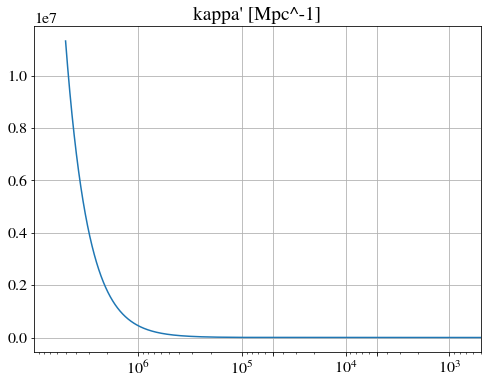

In [23]:

key=list(thermo.keys())[3]
plt.figure(i)
plt.semilogx(thermo['z'],thermo[key])
plt.gca().set_xticks(ticks=[10**6,10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()
plt.title(key)
plt.xlim(5*10**2,10**7)
#plt.xlim(7.3*10**4,7.6*10**4)
#plt.ylim(0,1.2)
plt.gca().invert_xaxis()

In [ ]:

#Note that the closer you are to the breaking point, the longer it takes to evaluate class, it seems like. 
#For me=0.001, we have
#mp=0.5, highest alpha .0257 ish. 
#mp=1, highest alpha=0.0254
#mp=2
#mp=5
#mp=10, highest alpha = 0.0265
#So it's not monotonic, so is it a little bit random? It's the same every time though, it either evaluates or not. 
#
#For me=0.005, mp=0.5, highest alpha = 0.033 ish. 
#So it scales with me? 
#for me=0.0005, mp=0.5, highest alpha=0.023 to 0.024. 

#for me=0.008, mp=0.5, highest alpha=0.035ish. 
#for me=0.01,mp=0.5, highest alpha=0.037 at least. 

#Ok so maximum alpha scales with me - not sure what the dependence is. 

In [ ]:
#It's specifically the transition from T_B being the same as T_gammadark to solving for it with Boltzmann. 
#Are any constants being used which aren't right? 
#How does the limit scale with mp and me? 

#For mp=10,me=0.005, highest alpha= .02345ish. Problematic redshifts: [35619.9 : 35179.1]
#Definitely the interval containing x_e=0.1. 

#For mp=1,me=0.002, highest alpha=0.0289. Problematic redshifts: [233569 : 230678]. 
#This is when x_e=0.1, it seems. 


#For mp = 5, me=0.001, r=0.1,deltaN=0.1, highest alpha=.026311
#problematic redshifts: 92932.5 : 91782.3    [91782.3 : 90646.3]
#Shift from saha to boltzmann is at a bit above 100k. 
#PROBLEM ISN"T AT THE TRANSITION FROM SAHA TO BOLTZMANN
#Is it at 0.1????
#Why? Is the limit the same for all mp, me? 
